In [1]:
#Imports

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import random as ran
import json
import h5py
import pickle
from pprint import pprint
from __future__ import print_function
import numpy
import matplotlib.image as mpimg
import csv

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras import backend as K
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.preprocessing import normalize
from keras.utils import to_categorical
from sklearn.preprocessing import normalize
from pprint import pprint
from keras.models import model_from_json
from keras.models import load_model
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.layers.normalization import BatchNormalization
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.patheffects as PathEffects

Using TensorFlow backend.


In [6]:
#Get samples of 2d and train the model with those 2d data, this will help to analysis on kink
def samples_2d():
    # generate samples
    X = np.load('./data_kinks/x_2d_moon.npy')
    y = np.load('./data_kinks/y_2d_moon.npy')
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 300
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy
# prepare data
x_train_2d, y_train_2d, x_test_2d, y_test_2d = samples_2d()
print(x_train_2d.shape)
print(y_test_2d.shape)

(300, 2)
(100, 2)


In [7]:
#From the 2d samples, make them sequential so that at first all red (0) labels, then all blue (1) labels
train_labels_2d = y_train_2d.argmax(1)

#Creating the samples of red (0) and blue (1) as if they are sequentially
x_train_2d_label0_inds = [i for i in range(len(train_labels_2d)) if train_labels_2d[i]==0]
x_train_2d_label1_inds = [i for i in range(len(train_labels_2d)) if train_labels_2d[i]==1]
x_train_2d_label_0_to_1_inds = x_train_2d_label0_inds+ x_train_2d_label1_inds

x_train_2d_seq = x_train_2d[x_train_2d_label_0_to_1_inds]
y_train_2d_seq = y_train_2d[x_train_2d_label_0_to_1_inds]
print('The shape of 2d data: ',x_train_2d_seq.shape)
print('The sequential labels are:\n',y_train_2d_seq.argmax(1))

The shape of 2d data:  (300, 2)
The sequential labels are:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [8]:
#Define a model with those 2d data
#Considering one hidden ReLU layer
def fully_connected_model_2d():
    model = Sequential()
    model.add(Dense(256, input_dim=2, activation='relu', bias_initializer='RandomNormal', kernel_initializer='RandomUniform')) #Using one ReLU layer like in the paper Quantizes ReLU
    model.add(Dense(2, activation='softmax'))
    return model

In [5]:
#Configuring the checkpointer
filepath3="./save_model_for_mnist3_1k/weights_model_{epoch:02d}.hdf5"
checkpointer3_2d = keras.callbacks.ModelCheckpoint(filepath3, monitor='val_loss',
                                                verbose=1, save_best_only=False,save_weights_only=False, mode='max', period=1)

In [14]:
#Train and saving the models
fully_model_2d=fully_connected_model_2d()
sgd = optimizers.SGD()
fully_model_2d.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
fully_model_2d.save('./save_model_for_mnist3_1k/Model_0th_epoch_not_trained_initialized_al.hdf5')

fully_model_2d_log = fully_model_2d.fit(x_train_2d_seq, y_train_2d_seq, batch_size=32, 
                          epochs=7000, verbose=1, validation_data=(x_train_2d_seq, y_train_2d_seq),callbacks=[checkpointer3_2d])

score = fully_model_2d.evaluate(x_test_2d, y_test_2d, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 300 samples, validate on 300 samples
Epoch 1/7000
300/300 [==============================] - 1s 2ms/step - loss: 0.6899 - acc: 0.5067 - val_loss: 0.6781 - val_acc: 0.5067

Epoch 00001: saving model to ./save_model_for_mnist3_1k/weights_model_01.hdf5
Epoch 2/7000
300/300 [==============================] - 0s 91us/step - loss: 0.6702 - acc: 0.5933 - val_loss: 0.6588 - val_acc: 0.7333

Epoch 00002: saving model to ./save_model_for_mnist3_1k/weights_model_02.hdf5
Epoch 3/7000
300/300 [==============================] - 0s 83us/step - loss: 0.6517 - acc: 0.7567 - val_loss: 0.6412 - val_acc: 0.8067

Epoch 00003: saving model to ./save_model_for_mnist3_1k/weights_model_03.hdf5
Epoch 4/7000
300/300 [==============================] - 0s 87us/step - loss: 0.6347 - acc: 0.8067 - val_loss: 0.6252 - val_acc: 0.8100

Epoch 00004: saving model to ./save_model_for_mnist3_1k/weights_model_04.hdf5
Epoch 5/7000
300/300 [==============================] - 0s 84us/step - loss: 0.6191 - acc: 0.8133 -

300/300 [==============================] - 0s 85us/step - loss: 0.3818 - acc: 0.8300 - val_loss: 0.3801 - val_acc: 0.8300

Epoch 00039: saving model to ./save_model_for_mnist3_1k/weights_model_39.hdf5
Epoch 40/7000
300/300 [==============================] - 0s 83us/step - loss: 0.3789 - acc: 0.8300 - val_loss: 0.3769 - val_acc: 0.8300

Epoch 00040: saving model to ./save_model_for_mnist3_1k/weights_model_40.hdf5
Epoch 41/7000
300/300 [==============================] - 0s 83us/step - loss: 0.3758 - acc: 0.8300 - val_loss: 0.3738 - val_acc: 0.8300

Epoch 00041: saving model to ./save_model_for_mnist3_1k/weights_model_41.hdf5
Epoch 42/7000
300/300 [==============================] - 0s 97us/step - loss: 0.3727 - acc: 0.8300 - val_loss: 0.3709 - val_acc: 0.8300

Epoch 00042: saving model to ./save_model_for_mnist3_1k/weights_model_42.hdf5
Epoch 43/7000
300/300 [==============================] - 0s 90us/step - loss: 0.3699 - acc: 0.8300 - val_loss: 0.3680 - val_acc: 0.8300

Epoch 00043: savi

300/300 [==============================] - 0s 88us/step - loss: 0.2845 - acc: 0.8600 - val_loss: 0.2841 - val_acc: 0.8600

Epoch 00115: saving model to ./save_model_for_mnist3_1k/weights_model_115.hdf5
Epoch 116/7000
300/300 [==============================] - 0s 81us/step - loss: 0.2841 - acc: 0.8633 - val_loss: 0.2837 - val_acc: 0.8600

Epoch 00116: saving model to ./save_model_for_mnist3_1k/weights_model_116.hdf5
Epoch 117/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2837 - acc: 0.8600 - val_loss: 0.2833 - val_acc: 0.8600

Epoch 00117: saving model to ./save_model_for_mnist3_1k/weights_model_117.hdf5
Epoch 118/7000
300/300 [==============================] - 0s 82us/step - loss: 0.2832 - acc: 0.8633 - val_loss: 0.2828 - val_acc: 0.8633

Epoch 00118: saving model to ./save_model_for_mnist3_1k/weights_model_118.hdf5
Epoch 119/7000
300/300 [==============================] - 0s 84us/step - loss: 0.2828 - acc: 0.8633 - val_loss: 0.2824 - val_acc: 0.8633

Epoch 001

Epoch 153/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2725 - acc: 0.8767 - val_loss: 0.2720 - val_acc: 0.8767

Epoch 00153: saving model to ./save_model_for_mnist3_1k/weights_model_153.hdf5
Epoch 154/7000
300/300 [==============================] - 0s 80us/step - loss: 0.2720 - acc: 0.8767 - val_loss: 0.2717 - val_acc: 0.8767

Epoch 00154: saving model to ./save_model_for_mnist3_1k/weights_model_154.hdf5
Epoch 155/7000
300/300 [==============================] - 0s 94us/step - loss: 0.2720 - acc: 0.8767 - val_loss: 0.2715 - val_acc: 0.8767

Epoch 00155: saving model to ./save_model_for_mnist3_1k/weights_model_155.hdf5
Epoch 156/7000
300/300 [==============================] - 0s 97us/step - loss: 0.2718 - acc: 0.8767 - val_loss: 0.2713 - val_acc: 0.8767

Epoch 00156: saving model to ./save_model_for_mnist3_1k/weights_model_156.hdf5
Epoch 157/7000
300/300 [==============================] - 0s 94us/step - loss: 0.2715 - acc: 0.8767 - val_loss: 0.2711 - val_acc: 0.

300/300 [==============================] - 0s 84us/step - loss: 0.2661 - acc: 0.8800 - val_loss: 0.2657 - val_acc: 0.8800

Epoch 00191: saving model to ./save_model_for_mnist3_1k/weights_model_191.hdf5
Epoch 192/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2658 - acc: 0.8800 - val_loss: 0.2656 - val_acc: 0.8800

Epoch 00192: saving model to ./save_model_for_mnist3_1k/weights_model_192.hdf5
Epoch 193/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2658 - acc: 0.8800 - val_loss: 0.2655 - val_acc: 0.8800

Epoch 00193: saving model to ./save_model_for_mnist3_1k/weights_model_193.hdf5
Epoch 194/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2656 - acc: 0.8800 - val_loss: 0.2654 - val_acc: 0.8800

Epoch 00194: saving model to ./save_model_for_mnist3_1k/weights_model_194.hdf5
Epoch 195/7000
300/300 [==============================] - 0s 86us/step - loss: 0.2656 - acc: 0.8800 - val_loss: 0.2653 - val_acc: 0.8800

Epoch 001

Epoch 229/7000
300/300 [==============================] - 0s 111us/step - loss: 0.2622 - acc: 0.8800 - val_loss: 0.2620 - val_acc: 0.8800

Epoch 00229: saving model to ./save_model_for_mnist3_1k/weights_model_229.hdf5
Epoch 230/7000
300/300 [==============================] - 0s 111us/step - loss: 0.2621 - acc: 0.8800 - val_loss: 0.2619 - val_acc: 0.8800

Epoch 00230: saving model to ./save_model_for_mnist3_1k/weights_model_230.hdf5
Epoch 231/7000
300/300 [==============================] - 0s 123us/step - loss: 0.2622 - acc: 0.8800 - val_loss: 0.2618 - val_acc: 0.8800

Epoch 00231: saving model to ./save_model_for_mnist3_1k/weights_model_231.hdf5
Epoch 232/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2621 - acc: 0.8800 - val_loss: 0.2617 - val_acc: 0.8800

Epoch 00232: saving model to ./save_model_for_mnist3_1k/weights_model_232.hdf5
Epoch 233/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2620 - acc: 0.8800 - val_loss: 0.2617 - val_acc

300/300 [==============================] - 0s 87us/step - loss: 0.2596 - acc: 0.8833 - val_loss: 0.2594 - val_acc: 0.8833

Epoch 00267: saving model to ./save_model_for_mnist3_1k/weights_model_267.hdf5
Epoch 268/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2597 - acc: 0.8833 - val_loss: 0.2593 - val_acc: 0.8833

Epoch 00268: saving model to ./save_model_for_mnist3_1k/weights_model_268.hdf5
Epoch 269/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2595 - acc: 0.8833 - val_loss: 0.2592 - val_acc: 0.8833

Epoch 00269: saving model to ./save_model_for_mnist3_1k/weights_model_269.hdf5
Epoch 270/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2594 - acc: 0.8833 - val_loss: 0.2591 - val_acc: 0.8833

Epoch 00270: saving model to ./save_model_for_mnist3_1k/weights_model_270.hdf5
Epoch 271/7000
300/300 [==============================] - 0s 94us/step - loss: 0.2594 - acc: 0.8833 - val_loss: 0.2591 - val_acc: 0.8833

Epoch 002

300/300 [==============================] - 0s 95us/step - loss: 0.2576 - acc: 0.8833 - val_loss: 0.2572 - val_acc: 0.8833

Epoch 00305: saving model to ./save_model_for_mnist3_1k/weights_model_305.hdf5
Epoch 306/7000
300/300 [==============================] - 0s 95us/step - loss: 0.2574 - acc: 0.8800 - val_loss: 0.2571 - val_acc: 0.8833

Epoch 00306: saving model to ./save_model_for_mnist3_1k/weights_model_306.hdf5
Epoch 307/7000
300/300 [==============================] - 0s 96us/step - loss: 0.2574 - acc: 0.8833 - val_loss: 0.2570 - val_acc: 0.8833

Epoch 00307: saving model to ./save_model_for_mnist3_1k/weights_model_307.hdf5
Epoch 308/7000
300/300 [==============================] - 0s 129us/step - loss: 0.2573 - acc: 0.8833 - val_loss: 0.2570 - val_acc: 0.8833

Epoch 00308: saving model to ./save_model_for_mnist3_1k/weights_model_308.hdf5
Epoch 309/7000
300/300 [==============================] - 0s 89us/step - loss: 0.2571 - acc: 0.8833 - val_loss: 0.2569 - val_acc: 0.8833

Epoch 00

300/300 [==============================] - 0s 91us/step - loss: 0.2554 - acc: 0.8867 - val_loss: 0.2551 - val_acc: 0.8867

Epoch 00343: saving model to ./save_model_for_mnist3_1k/weights_model_343.hdf5
Epoch 344/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2553 - acc: 0.8867 - val_loss: 0.2550 - val_acc: 0.8867

Epoch 00344: saving model to ./save_model_for_mnist3_1k/weights_model_344.hdf5
Epoch 345/7000
300/300 [==============================] - 0s 80us/step - loss: 0.2553 - acc: 0.8833 - val_loss: 0.2550 - val_acc: 0.8900

Epoch 00345: saving model to ./save_model_for_mnist3_1k/weights_model_345.hdf5
Epoch 346/7000
300/300 [==============================] - 0s 85us/step - loss: 0.2552 - acc: 0.8900 - val_loss: 0.2549 - val_acc: 0.8867

Epoch 00346: saving model to ./save_model_for_mnist3_1k/weights_model_346.hdf5
Epoch 347/7000
300/300 [==============================] - 0s 84us/step - loss: 0.2551 - acc: 0.8900 - val_loss: 0.2549 - val_acc: 0.8900

Epoch 003

Epoch 381/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2534 - acc: 0.8933 - val_loss: 0.2530 - val_acc: 0.8933

Epoch 00381: saving model to ./save_model_for_mnist3_1k/weights_model_381.hdf5
Epoch 382/7000
300/300 [==============================] - 0s 82us/step - loss: 0.2532 - acc: 0.8933 - val_loss: 0.2530 - val_acc: 0.8900

Epoch 00382: saving model to ./save_model_for_mnist3_1k/weights_model_382.hdf5
Epoch 383/7000
300/300 [==============================] - 0s 94us/step - loss: 0.2531 - acc: 0.8900 - val_loss: 0.2529 - val_acc: 0.8900

Epoch 00383: saving model to ./save_model_for_mnist3_1k/weights_model_383.hdf5
Epoch 384/7000
300/300 [==============================] - 0s 81us/step - loss: 0.2533 - acc: 0.8933 - val_loss: 0.2529 - val_acc: 0.8900

Epoch 00384: saving model to ./save_model_for_mnist3_1k/weights_model_384.hdf5
Epoch 385/7000
300/300 [==============================] - 0s 83us/step - loss: 0.2531 - acc: 0.8900 - val_loss: 0.2528 - val_acc: 0.

300/300 [==============================] - 0s 93us/step - loss: 0.2510 - acc: 0.8933 - val_loss: 0.2509 - val_acc: 0.8933

Epoch 00419: saving model to ./save_model_for_mnist3_1k/weights_model_419.hdf5
Epoch 420/7000
300/300 [==============================] - 0s 99us/step - loss: 0.2511 - acc: 0.8933 - val_loss: 0.2508 - val_acc: 0.8933

Epoch 00420: saving model to ./save_model_for_mnist3_1k/weights_model_420.hdf5
Epoch 421/7000
300/300 [==============================] - 0s 97us/step - loss: 0.2510 - acc: 0.8900 - val_loss: 0.2507 - val_acc: 0.8933

Epoch 00421: saving model to ./save_model_for_mnist3_1k/weights_model_421.hdf5
Epoch 422/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2510 - acc: 0.8933 - val_loss: 0.2507 - val_acc: 0.8933

Epoch 00422: saving model to ./save_model_for_mnist3_1k/weights_model_422.hdf5
Epoch 423/7000
300/300 [==============================] - 0s 89us/step - loss: 0.2510 - acc: 0.8933 - val_loss: 0.2506 - val_acc: 0.8933

Epoch 004

Epoch 457/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2488 - acc: 0.8933 - val_loss: 0.2485 - val_acc: 0.8933

Epoch 00457: saving model to ./save_model_for_mnist3_1k/weights_model_457.hdf5
Epoch 458/7000
300/300 [==============================] - 0s 103us/step - loss: 0.2487 - acc: 0.8933 - val_loss: 0.2485 - val_acc: 0.8933

Epoch 00458: saving model to ./save_model_for_mnist3_1k/weights_model_458.hdf5
Epoch 459/7000
300/300 [==============================] - 0s 107us/step - loss: 0.2487 - acc: 0.8933 - val_loss: 0.2484 - val_acc: 0.8933

Epoch 00459: saving model to ./save_model_for_mnist3_1k/weights_model_459.hdf5
Epoch 460/7000
300/300 [==============================] - 0s 96us/step - loss: 0.2485 - acc: 0.8933 - val_loss: 0.2483 - val_acc: 0.8933

Epoch 00460: saving model to ./save_model_for_mnist3_1k/weights_model_460.hdf5
Epoch 461/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2485 - acc: 0.8933 - val_loss: 0.2483 - val_acc:

300/300 [==============================] - 0s 92us/step - loss: 0.2464 - acc: 0.8933 - val_loss: 0.2460 - val_acc: 0.8933

Epoch 00495: saving model to ./save_model_for_mnist3_1k/weights_model_495.hdf5
Epoch 496/7000
300/300 [==============================] - 0s 87us/step - loss: 0.2465 - acc: 0.8933 - val_loss: 0.2460 - val_acc: 0.8933

Epoch 00496: saving model to ./save_model_for_mnist3_1k/weights_model_496.hdf5
Epoch 497/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2463 - acc: 0.8933 - val_loss: 0.2459 - val_acc: 0.8933

Epoch 00497: saving model to ./save_model_for_mnist3_1k/weights_model_497.hdf5
Epoch 498/7000
300/300 [==============================] - 0s 86us/step - loss: 0.2460 - acc: 0.8933 - val_loss: 0.2458 - val_acc: 0.8933

Epoch 00498: saving model to ./save_model_for_mnist3_1k/weights_model_498.hdf5
Epoch 499/7000
300/300 [==============================] - 0s 84us/step - loss: 0.2461 - acc: 0.8933 - val_loss: 0.2457 - val_acc: 0.8933

Epoch 004

Epoch 533/7000
300/300 [==============================] - 0s 106us/step - loss: 0.2438 - acc: 0.8933 - val_loss: 0.2432 - val_acc: 0.8933

Epoch 00533: saving model to ./save_model_for_mnist3_1k/weights_model_533.hdf5
Epoch 534/7000
300/300 [==============================] - 0s 102us/step - loss: 0.2438 - acc: 0.8933 - val_loss: 0.2431 - val_acc: 0.8933

Epoch 00534: saving model to ./save_model_for_mnist3_1k/weights_model_534.hdf5
Epoch 535/7000
300/300 [==============================] - 0s 105us/step - loss: 0.2433 - acc: 0.8933 - val_loss: 0.2431 - val_acc: 0.8933

Epoch 00535: saving model to ./save_model_for_mnist3_1k/weights_model_535.hdf5
Epoch 536/7000
300/300 [==============================] - 0s 104us/step - loss: 0.2434 - acc: 0.8967 - val_loss: 0.2430 - val_acc: 0.8933

Epoch 00536: saving model to ./save_model_for_mnist3_1k/weights_model_536.hdf5
Epoch 537/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2433 - acc: 0.8933 - val_loss: 0.2429 - val_ac

300/300 [==============================] - 0s 92us/step - loss: 0.2406 - acc: 0.8967 - val_loss: 0.2402 - val_acc: 0.8967

Epoch 00571: saving model to ./save_model_for_mnist3_1k/weights_model_571.hdf5
Epoch 572/7000
300/300 [==============================] - 0s 84us/step - loss: 0.2405 - acc: 0.8967 - val_loss: 0.2401 - val_acc: 0.8967

Epoch 00572: saving model to ./save_model_for_mnist3_1k/weights_model_572.hdf5
Epoch 573/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2403 - acc: 0.8967 - val_loss: 0.2400 - val_acc: 0.9000

Epoch 00573: saving model to ./save_model_for_mnist3_1k/weights_model_573.hdf5
Epoch 574/7000
300/300 [==============================] - 0s 83us/step - loss: 0.2402 - acc: 0.9000 - val_loss: 0.2400 - val_acc: 0.9000

Epoch 00574: saving model to ./save_model_for_mnist3_1k/weights_model_574.hdf5
Epoch 575/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2401 - acc: 0.9000 - val_loss: 0.2399 - val_acc: 0.9000

Epoch 005

300/300 [==============================] - 0s 90us/step - loss: 0.2372 - acc: 0.9000 - val_loss: 0.2369 - val_acc: 0.9000

Epoch 00609: saving model to ./save_model_for_mnist3_1k/weights_model_609.hdf5
Epoch 610/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2371 - acc: 0.9000 - val_loss: 0.2369 - val_acc: 0.9000

Epoch 00610: saving model to ./save_model_for_mnist3_1k/weights_model_610.hdf5
Epoch 611/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2372 - acc: 0.9000 - val_loss: 0.2368 - val_acc: 0.9000

Epoch 00611: saving model to ./save_model_for_mnist3_1k/weights_model_611.hdf5
Epoch 612/7000
300/300 [==============================] - 0s 89us/step - loss: 0.2371 - acc: 0.9000 - val_loss: 0.2367 - val_acc: 0.9000

Epoch 00612: saving model to ./save_model_for_mnist3_1k/weights_model_612.hdf5
Epoch 613/7000
300/300 [==============================] - 0s 87us/step - loss: 0.2369 - acc: 0.9000 - val_loss: 0.2365 - val_acc: 0.9000

Epoch 00

300/300 [==============================] - 0s 90us/step - loss: 0.2336 - acc: 0.9000 - val_loss: 0.2334 - val_acc: 0.9000

Epoch 00647: saving model to ./save_model_for_mnist3_1k/weights_model_647.hdf5
Epoch 648/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2335 - acc: 0.9000 - val_loss: 0.2333 - val_acc: 0.9000

Epoch 00648: saving model to ./save_model_for_mnist3_1k/weights_model_648.hdf5
Epoch 649/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2336 - acc: 0.9000 - val_loss: 0.2332 - val_acc: 0.9000

Epoch 00649: saving model to ./save_model_for_mnist3_1k/weights_model_649.hdf5
Epoch 650/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2336 - acc: 0.9000 - val_loss: 0.2331 - val_acc: 0.9000

Epoch 00650: saving model to ./save_model_for_mnist3_1k/weights_model_650.hdf5
Epoch 651/7000
300/300 [==============================] - 0s 98us/step - loss: 0.2332 - acc: 0.9000 - val_loss: 0.2330 - val_acc: 0.9000

Epoch 006

300/300 [==============================] - 0s 89us/step - loss: 0.2299 - acc: 0.9000 - val_loss: 0.2295 - val_acc: 0.9000

Epoch 00685: saving model to ./save_model_for_mnist3_1k/weights_model_685.hdf5
Epoch 686/7000
300/300 [==============================] - 0s 87us/step - loss: 0.2296 - acc: 0.9000 - val_loss: 0.2294 - val_acc: 0.9000

Epoch 00686: saving model to ./save_model_for_mnist3_1k/weights_model_686.hdf5
Epoch 687/7000
300/300 [==============================] - 0s 82us/step - loss: 0.2298 - acc: 0.9000 - val_loss: 0.2293 - val_acc: 0.9000

Epoch 00687: saving model to ./save_model_for_mnist3_1k/weights_model_687.hdf5
Epoch 688/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2296 - acc: 0.9000 - val_loss: 0.2292 - val_acc: 0.9000

Epoch 00688: saving model to ./save_model_for_mnist3_1k/weights_model_688.hdf5
Epoch 689/7000
300/300 [==============================] - 0s 87us/step - loss: 0.2294 - acc: 0.9000 - val_loss: 0.2291 - val_acc: 0.9000

Epoch 006

300/300 [==============================] - 0s 86us/step - loss: 0.2256 - acc: 0.9000 - val_loss: 0.2254 - val_acc: 0.9033

Epoch 00723: saving model to ./save_model_for_mnist3_1k/weights_model_723.hdf5
Epoch 724/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2259 - acc: 0.9033 - val_loss: 0.2253 - val_acc: 0.9000

Epoch 00724: saving model to ./save_model_for_mnist3_1k/weights_model_724.hdf5
Epoch 725/7000
300/300 [==============================] - 0s 89us/step - loss: 0.2254 - acc: 0.9000 - val_loss: 0.2252 - val_acc: 0.9033

Epoch 00725: saving model to ./save_model_for_mnist3_1k/weights_model_725.hdf5
Epoch 726/7000
300/300 [==============================] - 0s 96us/step - loss: 0.2257 - acc: 0.9033 - val_loss: 0.2252 - val_acc: 0.9033

Epoch 00726: saving model to ./save_model_for_mnist3_1k/weights_model_726.hdf5
Epoch 727/7000
300/300 [==============================] - 0s 87us/step - loss: 0.2255 - acc: 0.9067 - val_loss: 0.2251 - val_acc: 0.9033

Epoch 007

Epoch 761/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2212 - acc: 0.9033 - val_loss: 0.2210 - val_acc: 0.9033

Epoch 00761: saving model to ./save_model_for_mnist3_1k/weights_model_761.hdf5
Epoch 762/7000
300/300 [==============================] - 0s 107us/step - loss: 0.2212 - acc: 0.9033 - val_loss: 0.2209 - val_acc: 0.9033

Epoch 00762: saving model to ./save_model_for_mnist3_1k/weights_model_762.hdf5
Epoch 763/7000
300/300 [==============================] - 0s 107us/step - loss: 0.2210 - acc: 0.9033 - val_loss: 0.2208 - val_acc: 0.9033

Epoch 00763: saving model to ./save_model_for_mnist3_1k/weights_model_763.hdf5
Epoch 764/7000
300/300 [==============================] - 0s 108us/step - loss: 0.2211 - acc: 0.9033 - val_loss: 0.2206 - val_acc: 0.9033

Epoch 00764: saving model to ./save_model_for_mnist3_1k/weights_model_764.hdf5
Epoch 765/7000
300/300 [==============================] - 0s 106us/step - loss: 0.2207 - acc: 0.9033 - val_loss: 0.2205 - val_ac

300/300 [==============================] - 0s 98us/step - loss: 0.2167 - acc: 0.9033 - val_loss: 0.2162 - val_acc: 0.9033

Epoch 00799: saving model to ./save_model_for_mnist3_1k/weights_model_799.hdf5
Epoch 800/7000
300/300 [==============================] - 0s 95us/step - loss: 0.2163 - acc: 0.9067 - val_loss: 0.2161 - val_acc: 0.9033

Epoch 00800: saving model to ./save_model_for_mnist3_1k/weights_model_800.hdf5
Epoch 801/7000
300/300 [==============================] - 0s 100us/step - loss: 0.2163 - acc: 0.9033 - val_loss: 0.2160 - val_acc: 0.9033

Epoch 00801: saving model to ./save_model_for_mnist3_1k/weights_model_801.hdf5
Epoch 802/7000
300/300 [==============================] - 0s 94us/step - loss: 0.2161 - acc: 0.9033 - val_loss: 0.2159 - val_acc: 0.9033

Epoch 00802: saving model to ./save_model_for_mnist3_1k/weights_model_802.hdf5
Epoch 803/7000
300/300 [==============================] - 0s 92us/step - loss: 0.2159 - acc: 0.9033 - val_loss: 0.2157 - val_acc: 0.9033

Epoch 00

300/300 [==============================] - 0s 83us/step - loss: 0.2115 - acc: 0.9067 - val_loss: 0.2111 - val_acc: 0.9067

Epoch 00837: saving model to ./save_model_for_mnist3_1k/weights_model_837.hdf5
Epoch 838/7000
300/300 [==============================] - 0s 91us/step - loss: 0.2114 - acc: 0.9067 - val_loss: 0.2109 - val_acc: 0.9067

Epoch 00838: saving model to ./save_model_for_mnist3_1k/weights_model_838.hdf5
Epoch 839/7000
300/300 [==============================] - 0s 83us/step - loss: 0.2110 - acc: 0.9067 - val_loss: 0.2108 - val_acc: 0.9067

Epoch 00839: saving model to ./save_model_for_mnist3_1k/weights_model_839.hdf5
Epoch 840/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2109 - acc: 0.9067 - val_loss: 0.2106 - val_acc: 0.9067

Epoch 00840: saving model to ./save_model_for_mnist3_1k/weights_model_840.hdf5
Epoch 841/7000
300/300 [==============================] - 0s 90us/step - loss: 0.2107 - acc: 0.9067 - val_loss: 0.2105 - val_acc: 0.9067

Epoch 008

300/300 [==============================] - 0s 97us/step - loss: 0.2059 - acc: 0.9067 - val_loss: 0.2055 - val_acc: 0.9067

Epoch 00875: saving model to ./save_model_for_mnist3_1k/weights_model_875.hdf5
Epoch 876/7000
300/300 [==============================] - 0s 80us/step - loss: 0.2058 - acc: 0.9067 - val_loss: 0.2054 - val_acc: 0.9067

Epoch 00876: saving model to ./save_model_for_mnist3_1k/weights_model_876.hdf5
Epoch 877/7000
300/300 [==============================] - 0s 86us/step - loss: 0.2055 - acc: 0.9067 - val_loss: 0.2052 - val_acc: 0.9067

Epoch 00877: saving model to ./save_model_for_mnist3_1k/weights_model_877.hdf5
Epoch 878/7000
300/300 [==============================] - 0s 81us/step - loss: 0.2054 - acc: 0.9067 - val_loss: 0.2051 - val_acc: 0.9067

Epoch 00878: saving model to ./save_model_for_mnist3_1k/weights_model_878.hdf5
Epoch 879/7000
300/300 [==============================] - 0s 88us/step - loss: 0.2054 - acc: 0.9067 - val_loss: 0.2049 - val_acc: 0.9067

Epoch 008

300/300 [==============================] - 0s 79us/step - loss: 0.2000 - acc: 0.9067 - val_loss: 0.1996 - val_acc: 0.9067

Epoch 00913: saving model to ./save_model_for_mnist3_1k/weights_model_913.hdf5
Epoch 914/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1998 - acc: 0.9067 - val_loss: 0.1994 - val_acc: 0.9067

Epoch 00914: saving model to ./save_model_for_mnist3_1k/weights_model_914.hdf5
Epoch 915/7000
300/300 [==============================] - 0s 90us/step - loss: 0.1995 - acc: 0.9067 - val_loss: 0.1993 - val_acc: 0.9067

Epoch 00915: saving model to ./save_model_for_mnist3_1k/weights_model_915.hdf5
Epoch 916/7000
300/300 [==============================] - 0s 89us/step - loss: 0.1995 - acc: 0.9067 - val_loss: 0.1991 - val_acc: 0.9067

Epoch 00916: saving model to ./save_model_for_mnist3_1k/weights_model_916.hdf5
Epoch 917/7000
300/300 [==============================] - 0s 84us/step - loss: 0.1993 - acc: 0.9067 - val_loss: 0.1989 - val_acc: 0.9067

Epoch 009

Epoch 951/7000
300/300 [==============================] - 0s 87us/step - loss: 0.1936 - acc: 0.9067 - val_loss: 0.1934 - val_acc: 0.9067

Epoch 00951: saving model to ./save_model_for_mnist3_1k/weights_model_951.hdf5
Epoch 952/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1935 - acc: 0.9067 - val_loss: 0.1932 - val_acc: 0.9067

Epoch 00952: saving model to ./save_model_for_mnist3_1k/weights_model_952.hdf5
Epoch 953/7000
300/300 [==============================] - 0s 88us/step - loss: 0.1934 - acc: 0.9100 - val_loss: 0.1930 - val_acc: 0.9067

Epoch 00953: saving model to ./save_model_for_mnist3_1k/weights_model_953.hdf5
Epoch 954/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1932 - acc: 0.9067 - val_loss: 0.1929 - val_acc: 0.9067

Epoch 00954: saving model to ./save_model_for_mnist3_1k/weights_model_954.hdf5
Epoch 955/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1931 - acc: 0.9067 - val_loss: 0.1927 - val_acc: 0.

Epoch 989/7000
300/300 [==============================] - 0s 98us/step - loss: 0.1871 - acc: 0.9100 - val_loss: 0.1868 - val_acc: 0.9133

Epoch 00989: saving model to ./save_model_for_mnist3_1k/weights_model_989.hdf5
Epoch 990/7000
300/300 [==============================] - 0s 92us/step - loss: 0.1869 - acc: 0.9133 - val_loss: 0.1867 - val_acc: 0.9133

Epoch 00990: saving model to ./save_model_for_mnist3_1k/weights_model_990.hdf5
Epoch 991/7000
300/300 [==============================] - 0s 87us/step - loss: 0.1868 - acc: 0.9133 - val_loss: 0.1865 - val_acc: 0.9133

Epoch 00991: saving model to ./save_model_for_mnist3_1k/weights_model_991.hdf5
Epoch 992/7000
300/300 [==============================] - 0s 94us/step - loss: 0.1867 - acc: 0.9100 - val_loss: 0.1863 - val_acc: 0.9133

Epoch 00992: saving model to ./save_model_for_mnist3_1k/weights_model_992.hdf5
Epoch 993/7000
300/300 [==============================] - 0s 91us/step - loss: 0.1865 - acc: 0.9133 - val_loss: 0.1861 - val_acc: 0.


Epoch 01026: saving model to ./save_model_for_mnist3_1k/weights_model_1026.hdf5
Epoch 1027/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1802 - acc: 0.9167 - val_loss: 0.1800 - val_acc: 0.9167

Epoch 01027: saving model to ./save_model_for_mnist3_1k/weights_model_1027.hdf5
Epoch 1028/7000
300/300 [==============================] - 0s 78us/step - loss: 0.1801 - acc: 0.9167 - val_loss: 0.1798 - val_acc: 0.9167

Epoch 01028: saving model to ./save_model_for_mnist3_1k/weights_model_1028.hdf5
Epoch 1029/7000
300/300 [==============================] - 0s 85us/step - loss: 0.1800 - acc: 0.9167 - val_loss: 0.1796 - val_acc: 0.9167

Epoch 01029: saving model to ./save_model_for_mnist3_1k/weights_model_1029.hdf5
Epoch 1030/7000
300/300 [==============================] - 0s 84us/step - loss: 0.1799 - acc: 0.9167 - val_loss: 0.1794 - val_acc: 0.9167

Epoch 01030: saving model to ./save_model_for_mnist3_1k/weights_model_1030.hdf5
Epoch 1031/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.1734 - acc: 0.9167 - val_loss: 0.1731 - val_acc: 0.9200

Epoch 01064: saving model to ./save_model_for_mnist3_1k/weights_model_1064.hdf5
Epoch 1065/7000
300/300 [==============================] - 0s 88us/step - loss: 0.1733 - acc: 0.9200 - val_loss: 0.1728 - val_acc: 0.9167

Epoch 01065: saving model to ./save_model_for_mnist3_1k/weights_model_1065.hdf5
Epoch 1066/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1731 - acc: 0.9167 - val_loss: 0.1726 - val_acc: 0.9200

Epoch 01066: saving model to ./save_model_for_mnist3_1k/weights_model_1066.hdf5
Epoch 1067/7000
300/300 [==============================] - 0s 85us/step - loss: 0.1728 - acc: 0.9200 - val_loss: 0.1725 - val_acc: 0.9167

Epoch 01067: saving model to ./save_model_for_mnist3_1k/weights_model_1067.hdf5
Epoch 1068/7000
300/300 [==============================] - 0s 79us/step - loss: 0.1725 - acc: 0.9200 - val_loss: 0.1723 - val_acc: 0.9200

E


Epoch 01101: saving model to ./save_model_for_mnist3_1k/weights_model_1101.hdf5
Epoch 1102/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1662 - acc: 0.9233 - val_loss: 0.1658 - val_acc: 0.9233

Epoch 01102: saving model to ./save_model_for_mnist3_1k/weights_model_1102.hdf5
Epoch 1103/7000
300/300 [==============================] - 0s 88us/step - loss: 0.1659 - acc: 0.9233 - val_loss: 0.1656 - val_acc: 0.9233

Epoch 01103: saving model to ./save_model_for_mnist3_1k/weights_model_1103.hdf5
Epoch 1104/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1658 - acc: 0.9233 - val_loss: 0.1655 - val_acc: 0.9233

Epoch 01104: saving model to ./save_model_for_mnist3_1k/weights_model_1104.hdf5
Epoch 1105/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1656 - acc: 0.9233 - val_loss: 0.1653 - val_acc: 0.9233

Epoch 01105: saving model to ./save_model_for_mnist3_1k/weights_model_1105.hdf5
Epoch 1106/7000
300/300 [==================

300/300 [==============================] - 0s 89us/step - loss: 0.1591 - acc: 0.9300 - val_loss: 0.1588 - val_acc: 0.9300

Epoch 01139: saving model to ./save_model_for_mnist3_1k/weights_model_1139.hdf5
Epoch 1140/7000
300/300 [==============================] - 0s 89us/step - loss: 0.1588 - acc: 0.9300 - val_loss: 0.1586 - val_acc: 0.9267

Epoch 01140: saving model to ./save_model_for_mnist3_1k/weights_model_1140.hdf5
Epoch 1141/7000
300/300 [==============================] - 0s 98us/step - loss: 0.1588 - acc: 0.9300 - val_loss: 0.1584 - val_acc: 0.9267

Epoch 01141: saving model to ./save_model_for_mnist3_1k/weights_model_1141.hdf5
Epoch 1142/7000
300/300 [==============================] - 0s 91us/step - loss: 0.1585 - acc: 0.9267 - val_loss: 0.1582 - val_acc: 0.9300

Epoch 01142: saving model to ./save_model_for_mnist3_1k/weights_model_1142.hdf5
Epoch 1143/7000
300/300 [==============================] - 0s 88us/step - loss: 0.1583 - acc: 0.9300 - val_loss: 0.1580 - val_acc: 0.9300

E


Epoch 01176: saving model to ./save_model_for_mnist3_1k/weights_model_1176.hdf5
Epoch 1177/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1517 - acc: 0.9333 - val_loss: 0.1514 - val_acc: 0.9333

Epoch 01177: saving model to ./save_model_for_mnist3_1k/weights_model_1177.hdf5
Epoch 1178/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1516 - acc: 0.9367 - val_loss: 0.1513 - val_acc: 0.9333

Epoch 01178: saving model to ./save_model_for_mnist3_1k/weights_model_1178.hdf5
Epoch 1179/7000
300/300 [==============================] - 0s 79us/step - loss: 0.1513 - acc: 0.9367 - val_loss: 0.1511 - val_acc: 0.9333

Epoch 01179: saving model to ./save_model_for_mnist3_1k/weights_model_1179.hdf5
Epoch 1180/7000
300/300 [==============================] - 0s 92us/step - loss: 0.1513 - acc: 0.9333 - val_loss: 0.1509 - val_acc: 0.9333

Epoch 01180: saving model to ./save_model_for_mnist3_1k/weights_model_1180.hdf5
Epoch 1181/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.1446 - acc: 0.9400 - val_loss: 0.1443 - val_acc: 0.9400

Epoch 01214: saving model to ./save_model_for_mnist3_1k/weights_model_1214.hdf5
Epoch 1215/7000
300/300 [==============================] - 0s 84us/step - loss: 0.1446 - acc: 0.9400 - val_loss: 0.1441 - val_acc: 0.9400

Epoch 01215: saving model to ./save_model_for_mnist3_1k/weights_model_1215.hdf5
Epoch 1216/7000
300/300 [==============================] - 0s 87us/step - loss: 0.1443 - acc: 0.9400 - val_loss: 0.1440 - val_acc: 0.9400

Epoch 01216: saving model to ./save_model_for_mnist3_1k/weights_model_1216.hdf5
Epoch 1217/7000
300/300 [==============================] - 0s 82us/step - loss: 0.1441 - acc: 0.9400 - val_loss: 0.1438 - val_acc: 0.9400

Epoch 01217: saving model to ./save_model_for_mnist3_1k/weights_model_1217.hdf5
Epoch 1218/7000
300/300 [==============================] - 0s 79us/step - loss: 0.1440 - acc: 0.9400 - val_loss: 0.1436 - val_acc: 0.9400

E


Epoch 01251: saving model to ./save_model_for_mnist3_1k/weights_model_1251.hdf5
Epoch 1252/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1375 - acc: 0.9433 - val_loss: 0.1372 - val_acc: 0.9433

Epoch 01252: saving model to ./save_model_for_mnist3_1k/weights_model_1252.hdf5
Epoch 1253/7000
300/300 [==============================] - 0s 78us/step - loss: 0.1373 - acc: 0.9433 - val_loss: 0.1370 - val_acc: 0.9433

Epoch 01253: saving model to ./save_model_for_mnist3_1k/weights_model_1253.hdf5
Epoch 1254/7000
300/300 [==============================] - 0s 84us/step - loss: 0.1372 - acc: 0.9433 - val_loss: 0.1368 - val_acc: 0.9433

Epoch 01254: saving model to ./save_model_for_mnist3_1k/weights_model_1254.hdf5
Epoch 1255/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1371 - acc: 0.9433 - val_loss: 0.1367 - val_acc: 0.9433

Epoch 01255: saving model to ./save_model_for_mnist3_1k/weights_model_1255.hdf5
Epoch 1256/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.1307 - acc: 0.9500 - val_loss: 0.1305 - val_acc: 0.9467

Epoch 01289: saving model to ./save_model_for_mnist3_1k/weights_model_1289.hdf5
Epoch 1290/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1306 - acc: 0.9467 - val_loss: 0.1303 - val_acc: 0.9500

Epoch 01290: saving model to ./save_model_for_mnist3_1k/weights_model_1290.hdf5
Epoch 1291/7000
300/300 [==============================] - 0s 90us/step - loss: 0.1304 - acc: 0.9500 - val_loss: 0.1301 - val_acc: 0.9500

Epoch 01291: saving model to ./save_model_for_mnist3_1k/weights_model_1291.hdf5
Epoch 1292/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1302 - acc: 0.9500 - val_loss: 0.1299 - val_acc: 0.9500

Epoch 01292: saving model to ./save_model_for_mnist3_1k/weights_model_1292.hdf5
Epoch 1293/7000
300/300 [==============================] - 0s 97us/step - loss: 0.1300 - acc: 0.9500 - val_loss: 0.1297 - val_acc: 0.9500

E


Epoch 01326: saving model to ./save_model_for_mnist3_1k/weights_model_1326.hdf5
Epoch 1327/7000
300/300 [==============================] - 0s 82us/step - loss: 0.1241 - acc: 0.9567 - val_loss: 0.1237 - val_acc: 0.9600

Epoch 01327: saving model to ./save_model_for_mnist3_1k/weights_model_1327.hdf5
Epoch 1328/7000
300/300 [==============================] - 0s 84us/step - loss: 0.1238 - acc: 0.9600 - val_loss: 0.1236 - val_acc: 0.9600

Epoch 01328: saving model to ./save_model_for_mnist3_1k/weights_model_1328.hdf5
Epoch 1329/7000
300/300 [==============================] - 0s 82us/step - loss: 0.1236 - acc: 0.9600 - val_loss: 0.1234 - val_acc: 0.9600

Epoch 01329: saving model to ./save_model_for_mnist3_1k/weights_model_1329.hdf5
Epoch 1330/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1235 - acc: 0.9567 - val_loss: 0.1232 - val_acc: 0.9600

Epoch 01330: saving model to ./save_model_for_mnist3_1k/weights_model_1330.hdf5
Epoch 1331/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.1178 - acc: 0.9600 - val_loss: 0.1175 - val_acc: 0.9600

Epoch 01364: saving model to ./save_model_for_mnist3_1k/weights_model_1364.hdf5
Epoch 1365/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1175 - acc: 0.9600 - val_loss: 0.1173 - val_acc: 0.9600

Epoch 01365: saving model to ./save_model_for_mnist3_1k/weights_model_1365.hdf5
Epoch 1366/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1175 - acc: 0.9600 - val_loss: 0.1171 - val_acc: 0.9633

Epoch 01366: saving model to ./save_model_for_mnist3_1k/weights_model_1366.hdf5
Epoch 1367/7000
300/300 [==============================] - 0s 81us/step - loss: 0.1171 - acc: 0.9633 - val_loss: 0.1169 - val_acc: 0.9633

Epoch 01367: saving model to ./save_model_for_mnist3_1k/weights_model_1367.hdf5
Epoch 1368/7000
300/300 [==============================] - 0s 93us/step - loss: 0.1170 - acc: 0.9633 - val_loss: 0.1168 - val_acc: 0.9633

E


Epoch 01401: saving model to ./save_model_for_mnist3_1k/weights_model_1401.hdf5
Epoch 1402/7000
300/300 [==============================] - 0s 85us/step - loss: 0.1115 - acc: 0.9633 - val_loss: 0.1113 - val_acc: 0.9633

Epoch 01402: saving model to ./save_model_for_mnist3_1k/weights_model_1402.hdf5
Epoch 1403/7000
300/300 [==============================] - 0s 91us/step - loss: 0.1115 - acc: 0.9633 - val_loss: 0.1111 - val_acc: 0.9633

Epoch 01403: saving model to ./save_model_for_mnist3_1k/weights_model_1403.hdf5
Epoch 1404/7000
300/300 [==============================] - 0s 88us/step - loss: 0.1113 - acc: 0.9633 - val_loss: 0.1110 - val_acc: 0.9633

Epoch 01404: saving model to ./save_model_for_mnist3_1k/weights_model_1404.hdf5
Epoch 1405/7000
300/300 [==============================] - 0s 82us/step - loss: 0.1111 - acc: 0.9633 - val_loss: 0.1108 - val_acc: 0.9633

Epoch 01405: saving model to ./save_model_for_mnist3_1k/weights_model_1405.hdf5
Epoch 1406/7000
300/300 [==================

300/300 [==============================] - 0s 92us/step - loss: 0.1060 - acc: 0.9633 - val_loss: 0.1057 - val_acc: 0.9633

Epoch 01439: saving model to ./save_model_for_mnist3_1k/weights_model_1439.hdf5
Epoch 1440/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1057 - acc: 0.9633 - val_loss: 0.1055 - val_acc: 0.9633

Epoch 01440: saving model to ./save_model_for_mnist3_1k/weights_model_1440.hdf5
Epoch 1441/7000
300/300 [==============================] - 0s 83us/step - loss: 0.1055 - acc: 0.9633 - val_loss: 0.1054 - val_acc: 0.9633

Epoch 01441: saving model to ./save_model_for_mnist3_1k/weights_model_1441.hdf5
Epoch 1442/7000
300/300 [==============================] - 0s 80us/step - loss: 0.1056 - acc: 0.9633 - val_loss: 0.1052 - val_acc: 0.9633

Epoch 01442: saving model to ./save_model_for_mnist3_1k/weights_model_1442.hdf5
Epoch 1443/7000
300/300 [==============================] - 0s 92us/step - loss: 0.1053 - acc: 0.9633 - val_loss: 0.1051 - val_acc: 0.9633

E


Epoch 01476: saving model to ./save_model_for_mnist3_1k/weights_model_1476.hdf5
Epoch 1477/7000
300/300 [==============================] - 0s 93us/step - loss: 0.1005 - acc: 0.9700 - val_loss: 0.1002 - val_acc: 0.9700

Epoch 01477: saving model to ./save_model_for_mnist3_1k/weights_model_1477.hdf5
Epoch 1478/7000
300/300 [==============================] - 0s 87us/step - loss: 0.1003 - acc: 0.9700 - val_loss: 0.1001 - val_acc: 0.9700

Epoch 01478: saving model to ./save_model_for_mnist3_1k/weights_model_1478.hdf5
Epoch 1479/7000
300/300 [==============================] - 0s 86us/step - loss: 0.1003 - acc: 0.9700 - val_loss: 0.1000 - val_acc: 0.9700

Epoch 01479: saving model to ./save_model_for_mnist3_1k/weights_model_1479.hdf5
Epoch 1480/7000
300/300 [==============================] - 0s 87us/step - loss: 0.1000 - acc: 0.9700 - val_loss: 0.0999 - val_acc: 0.9667

Epoch 01480: saving model to ./save_model_for_mnist3_1k/weights_model_1480.hdf5
Epoch 1481/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0956 - acc: 0.9700 - val_loss: 0.0953 - val_acc: 0.9700

Epoch 01514: saving model to ./save_model_for_mnist3_1k/weights_model_1514.hdf5
Epoch 1515/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0954 - acc: 0.9700 - val_loss: 0.0952 - val_acc: 0.9700

Epoch 01515: saving model to ./save_model_for_mnist3_1k/weights_model_1515.hdf5
Epoch 1516/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0952 - acc: 0.9700 - val_loss: 0.0951 - val_acc: 0.9700

Epoch 01516: saving model to ./save_model_for_mnist3_1k/weights_model_1516.hdf5
Epoch 1517/7000
300/300 [==============================] - 0s 102us/step - loss: 0.0951 - acc: 0.9700 - val_loss: 0.0949 - val_acc: 0.9700

Epoch 01517: saving model to ./save_model_for_mnist3_1k/weights_model_1517.hdf5
Epoch 1518/7000
300/300 [==============================] - 0s 100us/step - loss: 0.0951 - acc: 0.9700 - val_loss: 0.0948 - val_acc: 0.9700



Epoch 01551: saving model to ./save_model_for_mnist3_1k/weights_model_1551.hdf5
Epoch 1552/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0907 - acc: 0.9733 - val_loss: 0.0906 - val_acc: 0.9733

Epoch 01552: saving model to ./save_model_for_mnist3_1k/weights_model_1552.hdf5
Epoch 1553/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0907 - acc: 0.9733 - val_loss: 0.0905 - val_acc: 0.9733

Epoch 01553: saving model to ./save_model_for_mnist3_1k/weights_model_1553.hdf5
Epoch 1554/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0905 - acc: 0.9733 - val_loss: 0.0903 - val_acc: 0.9733

Epoch 01554: saving model to ./save_model_for_mnist3_1k/weights_model_1554.hdf5
Epoch 1555/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0904 - acc: 0.9733 - val_loss: 0.0902 - val_acc: 0.9733

Epoch 01555: saving model to ./save_model_for_mnist3_1k/weights_model_1555.hdf5
Epoch 1556/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0865 - acc: 0.9733 - val_loss: 0.0863 - val_acc: 0.9733

Epoch 01589: saving model to ./save_model_for_mnist3_1k/weights_model_1589.hdf5
Epoch 1590/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0863 - acc: 0.9733 - val_loss: 0.0862 - val_acc: 0.9733

Epoch 01590: saving model to ./save_model_for_mnist3_1k/weights_model_1590.hdf5
Epoch 1591/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0863 - acc: 0.9733 - val_loss: 0.0861 - val_acc: 0.9733

Epoch 01591: saving model to ./save_model_for_mnist3_1k/weights_model_1591.hdf5
Epoch 1592/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0861 - acc: 0.9733 - val_loss: 0.0859 - val_acc: 0.9733

Epoch 01592: saving model to ./save_model_for_mnist3_1k/weights_model_1592.hdf5
Epoch 1593/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0859 - acc: 0.9733 - val_loss: 0.0858 - val_acc: 0.9767

E


Epoch 01626: saving model to ./save_model_for_mnist3_1k/weights_model_1626.hdf5
Epoch 1627/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0824 - acc: 0.9767 - val_loss: 0.0822 - val_acc: 0.9767

Epoch 01627: saving model to ./save_model_for_mnist3_1k/weights_model_1627.hdf5
Epoch 1628/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0823 - acc: 0.9767 - val_loss: 0.0821 - val_acc: 0.9767

Epoch 01628: saving model to ./save_model_for_mnist3_1k/weights_model_1628.hdf5
Epoch 1629/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0821 - acc: 0.9767 - val_loss: 0.0820 - val_acc: 0.9767

Epoch 01629: saving model to ./save_model_for_mnist3_1k/weights_model_1629.hdf5
Epoch 1630/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0820 - acc: 0.9767 - val_loss: 0.0819 - val_acc: 0.9767

Epoch 01630: saving model to ./save_model_for_mnist3_1k/weights_model_1630.hdf5
Epoch 1631/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0787 - acc: 0.9767 - val_loss: 0.0785 - val_acc: 0.9767

Epoch 01664: saving model to ./save_model_for_mnist3_1k/weights_model_1664.hdf5
Epoch 1665/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0785 - acc: 0.9767 - val_loss: 0.0784 - val_acc: 0.9767

Epoch 01665: saving model to ./save_model_for_mnist3_1k/weights_model_1665.hdf5
Epoch 1666/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0785 - acc: 0.9767 - val_loss: 0.0783 - val_acc: 0.9767

Epoch 01666: saving model to ./save_model_for_mnist3_1k/weights_model_1666.hdf5
Epoch 1667/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0784 - acc: 0.9767 - val_loss: 0.0782 - val_acc: 0.9767

Epoch 01667: saving model to ./save_model_for_mnist3_1k/weights_model_1667.hdf5
Epoch 1668/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0784 - acc: 0.9767 - val_loss: 0.0781 - val_acc: 0.9767

E


Epoch 01701: saving model to ./save_model_for_mnist3_1k/weights_model_1701.hdf5
Epoch 1702/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0751 - acc: 0.9767 - val_loss: 0.0750 - val_acc: 0.9767

Epoch 01702: saving model to ./save_model_for_mnist3_1k/weights_model_1702.hdf5
Epoch 1703/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0750 - acc: 0.9767 - val_loss: 0.0749 - val_acc: 0.9767

Epoch 01703: saving model to ./save_model_for_mnist3_1k/weights_model_1703.hdf5
Epoch 1704/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0750 - acc: 0.9767 - val_loss: 0.0748 - val_acc: 0.9767

Epoch 01704: saving model to ./save_model_for_mnist3_1k/weights_model_1704.hdf5
Epoch 1705/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0748 - acc: 0.9767 - val_loss: 0.0747 - val_acc: 0.9767

Epoch 01705: saving model to ./save_model_for_mnist3_1k/weights_model_1705.hdf5
Epoch 1706/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0720 - acc: 0.9800 - val_loss: 0.0718 - val_acc: 0.9767

Epoch 01739: saving model to ./save_model_for_mnist3_1k/weights_model_1739.hdf5
Epoch 1740/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0718 - acc: 0.9767 - val_loss: 0.0717 - val_acc: 0.9800

Epoch 01740: saving model to ./save_model_for_mnist3_1k/weights_model_1740.hdf5
Epoch 1741/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0718 - acc: 0.9767 - val_loss: 0.0716 - val_acc: 0.9767

Epoch 01741: saving model to ./save_model_for_mnist3_1k/weights_model_1741.hdf5
Epoch 1742/7000
300/300 [==============================] - 0s 99us/step - loss: 0.0717 - acc: 0.9767 - val_loss: 0.0716 - val_acc: 0.9767

Epoch 01742: saving model to ./save_model_for_mnist3_1k/weights_model_1742.hdf5
Epoch 1743/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0716 - acc: 0.9767 - val_loss: 0.0715 - val_acc: 0.9767

E


Epoch 01776: saving model to ./save_model_for_mnist3_1k/weights_model_1776.hdf5
Epoch 1777/7000
300/300 [==============================] - 0s 98us/step - loss: 0.0689 - acc: 0.9800 - val_loss: 0.0687 - val_acc: 0.9800

Epoch 01777: saving model to ./save_model_for_mnist3_1k/weights_model_1777.hdf5
Epoch 1778/7000
300/300 [==============================] - 0s 98us/step - loss: 0.0688 - acc: 0.9800 - val_loss: 0.0687 - val_acc: 0.9800

Epoch 01778: saving model to ./save_model_for_mnist3_1k/weights_model_1778.hdf5
Epoch 1779/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0687 - acc: 0.9800 - val_loss: 0.0686 - val_acc: 0.9800

Epoch 01779: saving model to ./save_model_for_mnist3_1k/weights_model_1779.hdf5
Epoch 1780/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0687 - acc: 0.9800 - val_loss: 0.0685 - val_acc: 0.9800

Epoch 01780: saving model to ./save_model_for_mnist3_1k/weights_model_1780.hdf5
Epoch 1781/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0661 - acc: 0.9800 - val_loss: 0.0660 - val_acc: 0.9833

Epoch 01814: saving model to ./save_model_for_mnist3_1k/weights_model_1814.hdf5
Epoch 1815/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0661 - acc: 0.9833 - val_loss: 0.0659 - val_acc: 0.9833

Epoch 01815: saving model to ./save_model_for_mnist3_1k/weights_model_1815.hdf5
Epoch 1816/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0659 - acc: 0.9833 - val_loss: 0.0659 - val_acc: 0.9833

Epoch 01816: saving model to ./save_model_for_mnist3_1k/weights_model_1816.hdf5
Epoch 1817/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0659 - acc: 0.9800 - val_loss: 0.0658 - val_acc: 0.9833

Epoch 01817: saving model to ./save_model_for_mnist3_1k/weights_model_1817.hdf5
Epoch 1818/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0659 - acc: 0.9833 - val_loss: 0.0657 - val_acc: 0.9833

E


Epoch 01851: saving model to ./save_model_for_mnist3_1k/weights_model_1851.hdf5
Epoch 1852/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0635 - acc: 0.9833 - val_loss: 0.0634 - val_acc: 0.9833

Epoch 01852: saving model to ./save_model_for_mnist3_1k/weights_model_1852.hdf5
Epoch 1853/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0636 - acc: 0.9833 - val_loss: 0.0634 - val_acc: 0.9833

Epoch 01853: saving model to ./save_model_for_mnist3_1k/weights_model_1853.hdf5
Epoch 1854/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0634 - acc: 0.9833 - val_loss: 0.0633 - val_acc: 0.9833

Epoch 01854: saving model to ./save_model_for_mnist3_1k/weights_model_1854.hdf5
Epoch 1855/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0633 - acc: 0.9833 - val_loss: 0.0632 - val_acc: 0.9833

Epoch 01855: saving model to ./save_model_for_mnist3_1k/weights_model_1855.hdf5
Epoch 1856/7000
300/300 [==================

300/300 [==============================] - 0s 97us/step - loss: 0.0611 - acc: 0.9833 - val_loss: 0.0611 - val_acc: 0.9833

Epoch 01889: saving model to ./save_model_for_mnist3_1k/weights_model_1889.hdf5
Epoch 1890/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0611 - acc: 0.9833 - val_loss: 0.0610 - val_acc: 0.9833

Epoch 01890: saving model to ./save_model_for_mnist3_1k/weights_model_1890.hdf5
Epoch 1891/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0611 - acc: 0.9833 - val_loss: 0.0609 - val_acc: 0.9833

Epoch 01891: saving model to ./save_model_for_mnist3_1k/weights_model_1891.hdf5
Epoch 1892/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0610 - acc: 0.9833 - val_loss: 0.0609 - val_acc: 0.9833

Epoch 01892: saving model to ./save_model_for_mnist3_1k/weights_model_1892.hdf5
Epoch 1893/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0609 - acc: 0.9833 - val_loss: 0.0608 - val_acc: 0.9833

E


Epoch 01926: saving model to ./save_model_for_mnist3_1k/weights_model_1926.hdf5
Epoch 1927/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0589 - acc: 0.9833 - val_loss: 0.0588 - val_acc: 0.9833

Epoch 01927: saving model to ./save_model_for_mnist3_1k/weights_model_1927.hdf5
Epoch 1928/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0589 - acc: 0.9833 - val_loss: 0.0587 - val_acc: 0.9833

Epoch 01928: saving model to ./save_model_for_mnist3_1k/weights_model_1928.hdf5
Epoch 1929/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0588 - acc: 0.9833 - val_loss: 0.0587 - val_acc: 0.9833

Epoch 01929: saving model to ./save_model_for_mnist3_1k/weights_model_1929.hdf5
Epoch 1930/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0588 - acc: 0.9833 - val_loss: 0.0586 - val_acc: 0.9833

Epoch 01930: saving model to ./save_model_for_mnist3_1k/weights_model_1930.hdf5
Epoch 1931/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0569 - acc: 0.9833 - val_loss: 0.0568 - val_acc: 0.9833

Epoch 01964: saving model to ./save_model_for_mnist3_1k/weights_model_1964.hdf5
Epoch 1965/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0568 - acc: 0.9833 - val_loss: 0.0567 - val_acc: 0.9833

Epoch 01965: saving model to ./save_model_for_mnist3_1k/weights_model_1965.hdf5
Epoch 1966/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0568 - acc: 0.9833 - val_loss: 0.0567 - val_acc: 0.9833

Epoch 01966: saving model to ./save_model_for_mnist3_1k/weights_model_1966.hdf5
Epoch 1967/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0567 - acc: 0.9833 - val_loss: 0.0566 - val_acc: 0.9833

Epoch 01967: saving model to ./save_model_for_mnist3_1k/weights_model_1967.hdf5
Epoch 1968/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0567 - acc: 0.9833 - val_loss: 0.0565 - val_acc: 0.9867

E


Epoch 02001: saving model to ./save_model_for_mnist3_1k/weights_model_2001.hdf5
Epoch 2002/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0549 - acc: 0.9867 - val_loss: 0.0548 - val_acc: 0.9867

Epoch 02002: saving model to ./save_model_for_mnist3_1k/weights_model_2002.hdf5
Epoch 2003/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0549 - acc: 0.9867 - val_loss: 0.0548 - val_acc: 0.9867

Epoch 02003: saving model to ./save_model_for_mnist3_1k/weights_model_2003.hdf5
Epoch 2004/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0549 - acc: 0.9867 - val_loss: 0.0547 - val_acc: 0.9867

Epoch 02004: saving model to ./save_model_for_mnist3_1k/weights_model_2004.hdf5
Epoch 2005/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0548 - acc: 0.9867 - val_loss: 0.0547 - val_acc: 0.9867

Epoch 02005: saving model to ./save_model_for_mnist3_1k/weights_model_2005.hdf5
Epoch 2006/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0532 - acc: 0.9867 - val_loss: 0.0531 - val_acc: 0.9867

Epoch 02039: saving model to ./save_model_for_mnist3_1k/weights_model_2039.hdf5
Epoch 2040/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0532 - acc: 0.9867 - val_loss: 0.0530 - val_acc: 0.9867

Epoch 02040: saving model to ./save_model_for_mnist3_1k/weights_model_2040.hdf5
Epoch 2041/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0531 - acc: 0.9867 - val_loss: 0.0530 - val_acc: 0.9867

Epoch 02041: saving model to ./save_model_for_mnist3_1k/weights_model_2041.hdf5
Epoch 2042/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0530 - acc: 0.9867 - val_loss: 0.0529 - val_acc: 0.9867

Epoch 02042: saving model to ./save_model_for_mnist3_1k/weights_model_2042.hdf5
Epoch 2043/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0530 - acc: 0.9867 - val_loss: 0.0529 - val_acc: 0.9867

E


Epoch 02076: saving model to ./save_model_for_mnist3_1k/weights_model_2076.hdf5
Epoch 2077/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0515 - acc: 0.9867 - val_loss: 0.0514 - val_acc: 0.9867

Epoch 02077: saving model to ./save_model_for_mnist3_1k/weights_model_2077.hdf5
Epoch 2078/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0515 - acc: 0.9867 - val_loss: 0.0514 - val_acc: 0.9867

Epoch 02078: saving model to ./save_model_for_mnist3_1k/weights_model_2078.hdf5
Epoch 2079/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0514 - acc: 0.9867 - val_loss: 0.0513 - val_acc: 0.9867

Epoch 02079: saving model to ./save_model_for_mnist3_1k/weights_model_2079.hdf5
Epoch 2080/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0514 - acc: 0.9867 - val_loss: 0.0513 - val_acc: 0.9867

Epoch 02080: saving model to ./save_model_for_mnist3_1k/weights_model_2080.hdf5
Epoch 2081/7000
300/300 [==================

300/300 [==============================] - 0s 79us/step - loss: 0.0500 - acc: 0.9867 - val_loss: 0.0499 - val_acc: 0.9867

Epoch 02114: saving model to ./save_model_for_mnist3_1k/weights_model_2114.hdf5
Epoch 2115/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0499 - acc: 0.9867 - val_loss: 0.0498 - val_acc: 0.9867

Epoch 02115: saving model to ./save_model_for_mnist3_1k/weights_model_2115.hdf5
Epoch 2116/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0499 - acc: 0.9867 - val_loss: 0.0498 - val_acc: 0.9867

Epoch 02116: saving model to ./save_model_for_mnist3_1k/weights_model_2116.hdf5
Epoch 2117/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0498 - acc: 0.9867 - val_loss: 0.0497 - val_acc: 0.9867

Epoch 02117: saving model to ./save_model_for_mnist3_1k/weights_model_2117.hdf5
Epoch 2118/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0498 - acc: 0.9867 - val_loss: 0.0497 - val_acc: 0.9867

E


Epoch 02151: saving model to ./save_model_for_mnist3_1k/weights_model_2151.hdf5
Epoch 2152/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0484 - acc: 0.9867 - val_loss: 0.0484 - val_acc: 0.9867

Epoch 02152: saving model to ./save_model_for_mnist3_1k/weights_model_2152.hdf5
Epoch 2153/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0484 - acc: 0.9867 - val_loss: 0.0484 - val_acc: 0.9867

Epoch 02153: saving model to ./save_model_for_mnist3_1k/weights_model_2153.hdf5
Epoch 2154/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0484 - acc: 0.9867 - val_loss: 0.0483 - val_acc: 0.9867

Epoch 02154: saving model to ./save_model_for_mnist3_1k/weights_model_2154.hdf5
Epoch 2155/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0484 - acc: 0.9867 - val_loss: 0.0483 - val_acc: 0.9867

Epoch 02155: saving model to ./save_model_for_mnist3_1k/weights_model_2155.hdf5
Epoch 2156/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0472 - acc: 0.9867 - val_loss: 0.0471 - val_acc: 0.9867

Epoch 02189: saving model to ./save_model_for_mnist3_1k/weights_model_2189.hdf5
Epoch 2190/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0471 - acc: 0.9867 - val_loss: 0.0470 - val_acc: 0.9867

Epoch 02190: saving model to ./save_model_for_mnist3_1k/weights_model_2190.hdf5
Epoch 2191/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0471 - acc: 0.9867 - val_loss: 0.0470 - val_acc: 0.9867

Epoch 02191: saving model to ./save_model_for_mnist3_1k/weights_model_2191.hdf5
Epoch 2192/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0470 - acc: 0.9867 - val_loss: 0.0469 - val_acc: 0.9867

Epoch 02192: saving model to ./save_model_for_mnist3_1k/weights_model_2192.hdf5
Epoch 2193/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0471 - acc: 0.9867 - val_loss: 0.0469 - val_acc: 0.9867

E


Epoch 02226: saving model to ./save_model_for_mnist3_1k/weights_model_2226.hdf5
Epoch 2227/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0459 - acc: 0.9900 - val_loss: 0.0458 - val_acc: 0.9900

Epoch 02227: saving model to ./save_model_for_mnist3_1k/weights_model_2227.hdf5
Epoch 2228/7000
300/300 [==============================] - 0s 94us/step - loss: 0.0458 - acc: 0.9900 - val_loss: 0.0457 - val_acc: 0.9900

Epoch 02228: saving model to ./save_model_for_mnist3_1k/weights_model_2228.hdf5
Epoch 2229/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0458 - acc: 0.9900 - val_loss: 0.0457 - val_acc: 0.9900

Epoch 02229: saving model to ./save_model_for_mnist3_1k/weights_model_2229.hdf5
Epoch 2230/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0457 - acc: 0.9900 - val_loss: 0.0457 - val_acc: 0.9900

Epoch 02230: saving model to ./save_model_for_mnist3_1k/weights_model_2230.hdf5
Epoch 2231/7000
300/300 [==================

300/300 [==============================] - 0s 80us/step - loss: 0.0446 - acc: 0.9900 - val_loss: 0.0446 - val_acc: 0.9933

Epoch 02264: saving model to ./save_model_for_mnist3_1k/weights_model_2264.hdf5
Epoch 2265/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0446 - acc: 0.9933 - val_loss: 0.0445 - val_acc: 0.9933

Epoch 02265: saving model to ./save_model_for_mnist3_1k/weights_model_2265.hdf5
Epoch 2266/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0446 - acc: 0.9933 - val_loss: 0.0445 - val_acc: 0.9933

Epoch 02266: saving model to ./save_model_for_mnist3_1k/weights_model_2266.hdf5
Epoch 2267/7000
300/300 [==============================] - 0s 107us/step - loss: 0.0445 - acc: 0.9933 - val_loss: 0.0445 - val_acc: 0.9933

Epoch 02267: saving model to ./save_model_for_mnist3_1k/weights_model_2267.hdf5
Epoch 2268/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0445 - acc: 0.9933 - val_loss: 0.0444 - val_acc: 0.9933




Epoch 02301: saving model to ./save_model_for_mnist3_1k/weights_model_2301.hdf5
Epoch 2302/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0435 - acc: 0.9933 - val_loss: 0.0434 - val_acc: 0.9933

Epoch 02302: saving model to ./save_model_for_mnist3_1k/weights_model_2302.hdf5
Epoch 2303/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0435 - acc: 0.9933 - val_loss: 0.0434 - val_acc: 0.9933

Epoch 02303: saving model to ./save_model_for_mnist3_1k/weights_model_2303.hdf5
Epoch 2304/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0434 - acc: 0.9933 - val_loss: 0.0434 - val_acc: 0.9933

Epoch 02304: saving model to ./save_model_for_mnist3_1k/weights_model_2304.hdf5
Epoch 2305/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0434 - acc: 0.9933 - val_loss: 0.0433 - val_acc: 0.9933

Epoch 02305: saving model to ./save_model_for_mnist3_1k/weights_model_2305.hdf5
Epoch 2306/7000
300/300 [==================

300/300 [==============================] - 0s 90us/step - loss: 0.0425 - acc: 0.9933 - val_loss: 0.0424 - val_acc: 0.9933

Epoch 02339: saving model to ./save_model_for_mnist3_1k/weights_model_2339.hdf5
Epoch 2340/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0424 - acc: 0.9933 - val_loss: 0.0424 - val_acc: 0.9933

Epoch 02340: saving model to ./save_model_for_mnist3_1k/weights_model_2340.hdf5
Epoch 2341/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0424 - acc: 0.9933 - val_loss: 0.0423 - val_acc: 0.9933

Epoch 02341: saving model to ./save_model_for_mnist3_1k/weights_model_2341.hdf5
Epoch 2342/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0424 - acc: 0.9933 - val_loss: 0.0423 - val_acc: 0.9933

Epoch 02342: saving model to ./save_model_for_mnist3_1k/weights_model_2342.hdf5
Epoch 2343/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0424 - acc: 0.9933 - val_loss: 0.0423 - val_acc: 0.9933

E


Epoch 02376: saving model to ./save_model_for_mnist3_1k/weights_model_2376.hdf5
Epoch 2377/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0414 - acc: 0.9933 - val_loss: 0.0414 - val_acc: 0.9933

Epoch 02377: saving model to ./save_model_for_mnist3_1k/weights_model_2377.hdf5
Epoch 2378/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0414 - acc: 0.9933 - val_loss: 0.0413 - val_acc: 0.9933

Epoch 02378: saving model to ./save_model_for_mnist3_1k/weights_model_2378.hdf5
Epoch 2379/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0414 - acc: 0.9933 - val_loss: 0.0413 - val_acc: 0.9933

Epoch 02379: saving model to ./save_model_for_mnist3_1k/weights_model_2379.hdf5
Epoch 2380/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0413 - acc: 0.9933 - val_loss: 0.0413 - val_acc: 0.9933

Epoch 02380: saving model to ./save_model_for_mnist3_1k/weights_model_2380.hdf5
Epoch 2381/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.0405 - acc: 0.9933 - val_loss: 0.0404 - val_acc: 0.9933

Epoch 02414: saving model to ./save_model_for_mnist3_1k/weights_model_2414.hdf5
Epoch 2415/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0405 - acc: 0.9933 - val_loss: 0.0404 - val_acc: 0.9933

Epoch 02415: saving model to ./save_model_for_mnist3_1k/weights_model_2415.hdf5
Epoch 2416/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0405 - acc: 0.9933 - val_loss: 0.0404 - val_acc: 0.9933

Epoch 02416: saving model to ./save_model_for_mnist3_1k/weights_model_2416.hdf5
Epoch 2417/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0405 - acc: 0.9933 - val_loss: 0.0404 - val_acc: 0.9933

Epoch 02417: saving model to ./save_model_for_mnist3_1k/weights_model_2417.hdf5
Epoch 2418/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0404 - acc: 0.9933 - val_loss: 0.0403 - val_acc: 0.9933

E


Epoch 02451: saving model to ./save_model_for_mnist3_1k/weights_model_2451.hdf5
Epoch 2452/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0396 - acc: 0.9933 - val_loss: 0.0395 - val_acc: 0.9933

Epoch 02452: saving model to ./save_model_for_mnist3_1k/weights_model_2452.hdf5
Epoch 2453/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0396 - acc: 0.9933 - val_loss: 0.0395 - val_acc: 0.9933

Epoch 02453: saving model to ./save_model_for_mnist3_1k/weights_model_2453.hdf5
Epoch 2454/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0396 - acc: 0.9933 - val_loss: 0.0395 - val_acc: 0.9933

Epoch 02454: saving model to ./save_model_for_mnist3_1k/weights_model_2454.hdf5
Epoch 2455/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0395 - acc: 0.9933 - val_loss: 0.0395 - val_acc: 0.9933

Epoch 02455: saving model to ./save_model_for_mnist3_1k/weights_model_2455.hdf5
Epoch 2456/7000
300/300 [==================

300/300 [==============================] - 0s 89us/step - loss: 0.0388 - acc: 0.9933 - val_loss: 0.0387 - val_acc: 0.9933

Epoch 02489: saving model to ./save_model_for_mnist3_1k/weights_model_2489.hdf5
Epoch 2490/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0387 - acc: 0.9933 - val_loss: 0.0387 - val_acc: 0.9933

Epoch 02490: saving model to ./save_model_for_mnist3_1k/weights_model_2490.hdf5
Epoch 2491/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0387 - acc: 0.9933 - val_loss: 0.0387 - val_acc: 0.9933

Epoch 02491: saving model to ./save_model_for_mnist3_1k/weights_model_2491.hdf5
Epoch 2492/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0387 - acc: 0.9933 - val_loss: 0.0386 - val_acc: 0.9933

Epoch 02492: saving model to ./save_model_for_mnist3_1k/weights_model_2492.hdf5
Epoch 2493/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0387 - acc: 0.9933 - val_loss: 0.0386 - val_acc: 0.9933

E


Epoch 02526: saving model to ./save_model_for_mnist3_1k/weights_model_2526.hdf5
Epoch 2527/7000
300/300 [==============================] - 0s 95us/step - loss: 0.0380 - acc: 0.9933 - val_loss: 0.0379 - val_acc: 0.9933

Epoch 02527: saving model to ./save_model_for_mnist3_1k/weights_model_2527.hdf5
Epoch 2528/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0380 - acc: 0.9933 - val_loss: 0.0379 - val_acc: 0.9933

Epoch 02528: saving model to ./save_model_for_mnist3_1k/weights_model_2528.hdf5
Epoch 2529/7000
300/300 [==============================] - 0s 98us/step - loss: 0.0380 - acc: 0.9933 - val_loss: 0.0379 - val_acc: 0.9933

Epoch 02529: saving model to ./save_model_for_mnist3_1k/weights_model_2529.hdf5
Epoch 2530/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0379 - acc: 0.9933 - val_loss: 0.0378 - val_acc: 0.9933

Epoch 02530: saving model to ./save_model_for_mnist3_1k/weights_model_2530.hdf5
Epoch 2531/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.0372 - acc: 0.9933 - val_loss: 0.0372 - val_acc: 0.9933

Epoch 02564: saving model to ./save_model_for_mnist3_1k/weights_model_2564.hdf5
Epoch 2565/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0372 - acc: 0.9933 - val_loss: 0.0371 - val_acc: 0.9933

Epoch 02565: saving model to ./save_model_for_mnist3_1k/weights_model_2565.hdf5
Epoch 2566/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0372 - acc: 0.9933 - val_loss: 0.0371 - val_acc: 0.9933

Epoch 02566: saving model to ./save_model_for_mnist3_1k/weights_model_2566.hdf5
Epoch 2567/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0371 - acc: 0.9933 - val_loss: 0.0371 - val_acc: 0.9933

Epoch 02567: saving model to ./save_model_for_mnist3_1k/weights_model_2567.hdf5
Epoch 2568/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0371 - acc: 0.9933 - val_loss: 0.0371 - val_acc: 0.9933

E


Epoch 02601: saving model to ./save_model_for_mnist3_1k/weights_model_2601.hdf5
Epoch 2602/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0365 - acc: 0.9933 - val_loss: 0.0364 - val_acc: 0.9933

Epoch 02602: saving model to ./save_model_for_mnist3_1k/weights_model_2602.hdf5
Epoch 2603/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0365 - acc: 0.9933 - val_loss: 0.0364 - val_acc: 0.9933

Epoch 02603: saving model to ./save_model_for_mnist3_1k/weights_model_2603.hdf5
Epoch 2604/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0365 - acc: 0.9933 - val_loss: 0.0364 - val_acc: 0.9933

Epoch 02604: saving model to ./save_model_for_mnist3_1k/weights_model_2604.hdf5
Epoch 2605/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0364 - acc: 0.9933 - val_loss: 0.0364 - val_acc: 0.9933

Epoch 02605: saving model to ./save_model_for_mnist3_1k/weights_model_2605.hdf5
Epoch 2606/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0359 - acc: 0.9933 - val_loss: 0.0358 - val_acc: 0.9933

Epoch 02639: saving model to ./save_model_for_mnist3_1k/weights_model_2639.hdf5
Epoch 2640/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0358 - acc: 0.9933 - val_loss: 0.0358 - val_acc: 0.9933

Epoch 02640: saving model to ./save_model_for_mnist3_1k/weights_model_2640.hdf5
Epoch 2641/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0358 - acc: 0.9933 - val_loss: 0.0358 - val_acc: 0.9933

Epoch 02641: saving model to ./save_model_for_mnist3_1k/weights_model_2641.hdf5
Epoch 2642/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0358 - acc: 0.9933 - val_loss: 0.0357 - val_acc: 0.9933

Epoch 02642: saving model to ./save_model_for_mnist3_1k/weights_model_2642.hdf5
Epoch 2643/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0358 - acc: 0.9933 - val_loss: 0.0357 - val_acc: 0.9933

E


Epoch 02676: saving model to ./save_model_for_mnist3_1k/weights_model_2676.hdf5
Epoch 2677/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0352 - acc: 0.9933 - val_loss: 0.0351 - val_acc: 0.9933

Epoch 02677: saving model to ./save_model_for_mnist3_1k/weights_model_2677.hdf5
Epoch 2678/7000
300/300 [==============================] - 0s 94us/step - loss: 0.0352 - acc: 0.9933 - val_loss: 0.0351 - val_acc: 0.9933

Epoch 02678: saving model to ./save_model_for_mnist3_1k/weights_model_2678.hdf5
Epoch 2679/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0352 - acc: 0.9933 - val_loss: 0.0351 - val_acc: 0.9933

Epoch 02679: saving model to ./save_model_for_mnist3_1k/weights_model_2679.hdf5
Epoch 2680/7000
300/300 [==============================] - 0s 96us/step - loss: 0.0351 - acc: 0.9933 - val_loss: 0.0351 - val_acc: 0.9933

Epoch 02680: saving model to ./save_model_for_mnist3_1k/weights_model_2680.hdf5
Epoch 2681/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0346 - acc: 0.9933 - val_loss: 0.0345 - val_acc: 0.9933

Epoch 02714: saving model to ./save_model_for_mnist3_1k/weights_model_2714.hdf5
Epoch 2715/7000
300/300 [==============================] - 0s 96us/step - loss: 0.0346 - acc: 0.9933 - val_loss: 0.0345 - val_acc: 0.9933

Epoch 02715: saving model to ./save_model_for_mnist3_1k/weights_model_2715.hdf5
Epoch 2716/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0346 - acc: 0.9933 - val_loss: 0.0345 - val_acc: 0.9933

Epoch 02716: saving model to ./save_model_for_mnist3_1k/weights_model_2716.hdf5
Epoch 2717/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0345 - acc: 0.9933 - val_loss: 0.0345 - val_acc: 0.9933

Epoch 02717: saving model to ./save_model_for_mnist3_1k/weights_model_2717.hdf5
Epoch 2718/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0345 - acc: 0.9933 - val_loss: 0.0345 - val_acc: 0.9933

E


Epoch 02751: saving model to ./save_model_for_mnist3_1k/weights_model_2751.hdf5
Epoch 2752/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0340 - acc: 0.9933 - val_loss: 0.0339 - val_acc: 0.9933

Epoch 02752: saving model to ./save_model_for_mnist3_1k/weights_model_2752.hdf5
Epoch 2753/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0339 - acc: 0.9933 - val_loss: 0.0339 - val_acc: 0.9933

Epoch 02753: saving model to ./save_model_for_mnist3_1k/weights_model_2753.hdf5
Epoch 2754/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0339 - acc: 0.9933 - val_loss: 0.0339 - val_acc: 0.9933

Epoch 02754: saving model to ./save_model_for_mnist3_1k/weights_model_2754.hdf5
Epoch 2755/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0339 - acc: 0.9933 - val_loss: 0.0339 - val_acc: 0.9933

Epoch 02755: saving model to ./save_model_for_mnist3_1k/weights_model_2755.hdf5
Epoch 2756/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.0334 - acc: 0.9933 - val_loss: 0.0334 - val_acc: 0.9933

Epoch 02789: saving model to ./save_model_for_mnist3_1k/weights_model_2789.hdf5
Epoch 2790/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0334 - acc: 0.9933 - val_loss: 0.0334 - val_acc: 0.9933

Epoch 02790: saving model to ./save_model_for_mnist3_1k/weights_model_2790.hdf5
Epoch 2791/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0334 - acc: 0.9933 - val_loss: 0.0333 - val_acc: 0.9933

Epoch 02791: saving model to ./save_model_for_mnist3_1k/weights_model_2791.hdf5
Epoch 2792/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0334 - acc: 0.9933 - val_loss: 0.0333 - val_acc: 0.9933

Epoch 02792: saving model to ./save_model_for_mnist3_1k/weights_model_2792.hdf5
Epoch 2793/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0334 - acc: 0.9933 - val_loss: 0.0333 - val_acc: 0.9933

E


Epoch 02826: saving model to ./save_model_for_mnist3_1k/weights_model_2826.hdf5
Epoch 2827/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0329 - acc: 0.9933 - val_loss: 0.0328 - val_acc: 0.9933

Epoch 02827: saving model to ./save_model_for_mnist3_1k/weights_model_2827.hdf5
Epoch 2828/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0329 - acc: 0.9933 - val_loss: 0.0328 - val_acc: 0.9933

Epoch 02828: saving model to ./save_model_for_mnist3_1k/weights_model_2828.hdf5
Epoch 2829/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0329 - acc: 0.9933 - val_loss: 0.0328 - val_acc: 0.9933

Epoch 02829: saving model to ./save_model_for_mnist3_1k/weights_model_2829.hdf5
Epoch 2830/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0329 - acc: 0.9933 - val_loss: 0.0328 - val_acc: 0.9933

Epoch 02830: saving model to ./save_model_for_mnist3_1k/weights_model_2830.hdf5
Epoch 2831/7000
300/300 [==================

300/300 [==============================] - 0s 100us/step - loss: 0.0324 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9933

Epoch 02864: saving model to ./save_model_for_mnist3_1k/weights_model_2864.hdf5
Epoch 2865/7000
300/300 [==============================] - 0s 95us/step - loss: 0.0324 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9933

Epoch 02865: saving model to ./save_model_for_mnist3_1k/weights_model_2865.hdf5
Epoch 2866/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0324 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9933

Epoch 02866: saving model to ./save_model_for_mnist3_1k/weights_model_2866.hdf5
Epoch 2867/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0324 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9933

Epoch 02867: saving model to ./save_model_for_mnist3_1k/weights_model_2867.hdf5
Epoch 2868/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0323 - acc: 0.9933 - val_loss: 0.0323 - val_acc: 0.9933




Epoch 02901: saving model to ./save_model_for_mnist3_1k/weights_model_2901.hdf5
Epoch 2902/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0319 - acc: 0.9933 - val_loss: 0.0318 - val_acc: 0.9933

Epoch 02902: saving model to ./save_model_for_mnist3_1k/weights_model_2902.hdf5
Epoch 2903/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0319 - acc: 0.9933 - val_loss: 0.0318 - val_acc: 0.9933

Epoch 02903: saving model to ./save_model_for_mnist3_1k/weights_model_2903.hdf5
Epoch 2904/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0319 - acc: 0.9933 - val_loss: 0.0318 - val_acc: 0.9933

Epoch 02904: saving model to ./save_model_for_mnist3_1k/weights_model_2904.hdf5
Epoch 2905/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0319 - acc: 0.9933 - val_loss: 0.0318 - val_acc: 0.9933

Epoch 02905: saving model to ./save_model_for_mnist3_1k/weights_model_2905.hdf5
Epoch 2906/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0314 - acc: 0.9933 - val_loss: 0.0314 - val_acc: 0.9933

Epoch 02939: saving model to ./save_model_for_mnist3_1k/weights_model_2939.hdf5
Epoch 2940/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0314 - acc: 0.9933 - val_loss: 0.0314 - val_acc: 0.9933

Epoch 02940: saving model to ./save_model_for_mnist3_1k/weights_model_2940.hdf5
Epoch 2941/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0314 - acc: 0.9933 - val_loss: 0.0314 - val_acc: 0.9933

Epoch 02941: saving model to ./save_model_for_mnist3_1k/weights_model_2941.hdf5
Epoch 2942/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0314 - acc: 0.9933 - val_loss: 0.0313 - val_acc: 0.9933

Epoch 02942: saving model to ./save_model_for_mnist3_1k/weights_model_2942.hdf5
Epoch 2943/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0314 - acc: 0.9933 - val_loss: 0.0313 - val_acc: 0.9933

E


Epoch 02976: saving model to ./save_model_for_mnist3_1k/weights_model_2976.hdf5
Epoch 2977/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0310 - acc: 0.9933 - val_loss: 0.0309 - val_acc: 0.9933

Epoch 02977: saving model to ./save_model_for_mnist3_1k/weights_model_2977.hdf5
Epoch 2978/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0309 - acc: 0.9933 - val_loss: 0.0309 - val_acc: 0.9933

Epoch 02978: saving model to ./save_model_for_mnist3_1k/weights_model_2978.hdf5
Epoch 2979/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0310 - acc: 0.9933 - val_loss: 0.0309 - val_acc: 0.9933

Epoch 02979: saving model to ./save_model_for_mnist3_1k/weights_model_2979.hdf5
Epoch 2980/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0309 - acc: 0.9933 - val_loss: 0.0309 - val_acc: 0.9933

Epoch 02980: saving model to ./save_model_for_mnist3_1k/weights_model_2980.hdf5
Epoch 2981/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0305 - acc: 0.9933 - val_loss: 0.0305 - val_acc: 0.9933

Epoch 03014: saving model to ./save_model_for_mnist3_1k/weights_model_3014.hdf5
Epoch 3015/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0305 - acc: 0.9933 - val_loss: 0.0305 - val_acc: 0.9933

Epoch 03015: saving model to ./save_model_for_mnist3_1k/weights_model_3015.hdf5
Epoch 3016/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0305 - acc: 0.9933 - val_loss: 0.0305 - val_acc: 0.9933

Epoch 03016: saving model to ./save_model_for_mnist3_1k/weights_model_3016.hdf5
Epoch 3017/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0305 - acc: 0.9933 - val_loss: 0.0305 - val_acc: 0.9933

Epoch 03017: saving model to ./save_model_for_mnist3_1k/weights_model_3017.hdf5
Epoch 3018/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0305 - acc: 0.9933 - val_loss: 0.0304 - val_acc: 0.9933

E


Epoch 03051: saving model to ./save_model_for_mnist3_1k/weights_model_3051.hdf5
Epoch 3052/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0302 - acc: 0.9933 - val_loss: 0.0301 - val_acc: 0.9933

Epoch 03052: saving model to ./save_model_for_mnist3_1k/weights_model_3052.hdf5
Epoch 3053/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0301 - acc: 0.9933 - val_loss: 0.0301 - val_acc: 0.9933

Epoch 03053: saving model to ./save_model_for_mnist3_1k/weights_model_3053.hdf5
Epoch 3054/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0301 - acc: 0.9933 - val_loss: 0.0301 - val_acc: 0.9933

Epoch 03054: saving model to ./save_model_for_mnist3_1k/weights_model_3054.hdf5
Epoch 3055/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0301 - acc: 0.9933 - val_loss: 0.0300 - val_acc: 0.9933

Epoch 03055: saving model to ./save_model_for_mnist3_1k/weights_model_3055.hdf5
Epoch 3056/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0297 - acc: 0.9933 - val_loss: 0.0297 - val_acc: 0.9933

Epoch 03089: saving model to ./save_model_for_mnist3_1k/weights_model_3089.hdf5
Epoch 3090/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0297 - acc: 0.9933 - val_loss: 0.0297 - val_acc: 0.9933

Epoch 03090: saving model to ./save_model_for_mnist3_1k/weights_model_3090.hdf5
Epoch 3091/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0297 - acc: 0.9933 - val_loss: 0.0297 - val_acc: 0.9933

Epoch 03091: saving model to ./save_model_for_mnist3_1k/weights_model_3091.hdf5
Epoch 3092/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0297 - acc: 0.9933 - val_loss: 0.0297 - val_acc: 0.9933

Epoch 03092: saving model to ./save_model_for_mnist3_1k/weights_model_3092.hdf5
Epoch 3093/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0297 - acc: 0.9933 - val_loss: 0.0296 - val_acc: 0.9933

E


Epoch 03126: saving model to ./save_model_for_mnist3_1k/weights_model_3126.hdf5
Epoch 3127/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0293 - acc: 0.9933 - val_loss: 0.0293 - val_acc: 0.9933

Epoch 03127: saving model to ./save_model_for_mnist3_1k/weights_model_3127.hdf5
Epoch 3128/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0294 - acc: 0.9933 - val_loss: 0.0293 - val_acc: 0.9933

Epoch 03128: saving model to ./save_model_for_mnist3_1k/weights_model_3128.hdf5
Epoch 3129/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0293 - acc: 0.9933 - val_loss: 0.0293 - val_acc: 0.9933

Epoch 03129: saving model to ./save_model_for_mnist3_1k/weights_model_3129.hdf5
Epoch 3130/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0293 - acc: 0.9933 - val_loss: 0.0293 - val_acc: 0.9933

Epoch 03130: saving model to ./save_model_for_mnist3_1k/weights_model_3130.hdf5
Epoch 3131/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.0289 - val_acc: 0.9933

Epoch 03164: saving model to ./save_model_for_mnist3_1k/weights_model_3164.hdf5
Epoch 3165/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.0289 - val_acc: 0.9933

Epoch 03165: saving model to ./save_model_for_mnist3_1k/weights_model_3165.hdf5
Epoch 3166/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.0289 - val_acc: 0.9933

Epoch 03166: saving model to ./save_model_for_mnist3_1k/weights_model_3166.hdf5
Epoch 3167/7000
300/300 [==============================] - 0s 94us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.0289 - val_acc: 0.9933

Epoch 03167: saving model to ./save_model_for_mnist3_1k/weights_model_3167.hdf5
Epoch 3168/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.0289 - val_acc: 0.9933

E


Epoch 03201: saving model to ./save_model_for_mnist3_1k/weights_model_3201.hdf5
Epoch 3202/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0286 - acc: 0.9933 - val_loss: 0.0286 - val_acc: 0.9933

Epoch 03202: saving model to ./save_model_for_mnist3_1k/weights_model_3202.hdf5
Epoch 3203/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0286 - acc: 0.9933 - val_loss: 0.0286 - val_acc: 0.9933

Epoch 03203: saving model to ./save_model_for_mnist3_1k/weights_model_3203.hdf5
Epoch 3204/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0286 - acc: 0.9933 - val_loss: 0.0286 - val_acc: 0.9933

Epoch 03204: saving model to ./save_model_for_mnist3_1k/weights_model_3204.hdf5
Epoch 3205/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0286 - acc: 0.9933 - val_loss: 0.0286 - val_acc: 0.9933

Epoch 03205: saving model to ./save_model_for_mnist3_1k/weights_model_3205.hdf5
Epoch 3206/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0283 - val_acc: 0.9933

Epoch 03239: saving model to ./save_model_for_mnist3_1k/weights_model_3239.hdf5
Epoch 3240/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0282 - val_acc: 0.9933

Epoch 03240: saving model to ./save_model_for_mnist3_1k/weights_model_3240.hdf5
Epoch 3241/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0282 - val_acc: 0.9933

Epoch 03241: saving model to ./save_model_for_mnist3_1k/weights_model_3241.hdf5
Epoch 3242/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0282 - val_acc: 0.9933

Epoch 03242: saving model to ./save_model_for_mnist3_1k/weights_model_3242.hdf5
Epoch 3243/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0282 - val_acc: 0.9933

E


Epoch 03276: saving model to ./save_model_for_mnist3_1k/weights_model_3276.hdf5
Epoch 3277/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0280 - acc: 0.9933 - val_loss: 0.0279 - val_acc: 0.9933

Epoch 03277: saving model to ./save_model_for_mnist3_1k/weights_model_3277.hdf5
Epoch 3278/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0280 - acc: 0.9933 - val_loss: 0.0279 - val_acc: 0.9933

Epoch 03278: saving model to ./save_model_for_mnist3_1k/weights_model_3278.hdf5
Epoch 3279/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0280 - acc: 0.9933 - val_loss: 0.0279 - val_acc: 0.9933

Epoch 03279: saving model to ./save_model_for_mnist3_1k/weights_model_3279.hdf5
Epoch 3280/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0280 - acc: 0.9933 - val_loss: 0.0279 - val_acc: 0.9933

Epoch 03280: saving model to ./save_model_for_mnist3_1k/weights_model_3280.hdf5
Epoch 3281/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0277 - acc: 0.9933 - val_loss: 0.0276 - val_acc: 0.9933

Epoch 03314: saving model to ./save_model_for_mnist3_1k/weights_model_3314.hdf5
Epoch 3315/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0277 - acc: 0.9933 - val_loss: 0.0276 - val_acc: 0.9933

Epoch 03315: saving model to ./save_model_for_mnist3_1k/weights_model_3315.hdf5
Epoch 3316/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0277 - acc: 0.9933 - val_loss: 0.0276 - val_acc: 0.9933

Epoch 03316: saving model to ./save_model_for_mnist3_1k/weights_model_3316.hdf5
Epoch 3317/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0276 - acc: 0.9933 - val_loss: 0.0276 - val_acc: 0.9933

Epoch 03317: saving model to ./save_model_for_mnist3_1k/weights_model_3317.hdf5
Epoch 3318/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0276 - acc: 0.9933 - val_loss: 0.0276 - val_acc: 0.9933

E


Epoch 03351: saving model to ./save_model_for_mnist3_1k/weights_model_3351.hdf5
Epoch 3352/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0274 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9933

Epoch 03352: saving model to ./save_model_for_mnist3_1k/weights_model_3352.hdf5
Epoch 3353/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0274 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9933

Epoch 03353: saving model to ./save_model_for_mnist3_1k/weights_model_3353.hdf5
Epoch 3354/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0273 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9933

Epoch 03354: saving model to ./save_model_for_mnist3_1k/weights_model_3354.hdf5
Epoch 3355/7000
300/300 [==============================] - 0s 100us/step - loss: 0.0274 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9933

Epoch 03355: saving model to ./save_model_for_mnist3_1k/weights_model_3355.hdf5
Epoch 3356/7000
300/300 [=================

300/300 [==============================] - 0s 81us/step - loss: 0.0271 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9933

Epoch 03389: saving model to ./save_model_for_mnist3_1k/weights_model_3389.hdf5
Epoch 3390/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0271 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9933

Epoch 03390: saving model to ./save_model_for_mnist3_1k/weights_model_3390.hdf5
Epoch 3391/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0270 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9933

Epoch 03391: saving model to ./save_model_for_mnist3_1k/weights_model_3391.hdf5
Epoch 3392/7000
300/300 [==============================] - 0s 78us/step - loss: 0.0271 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9933

Epoch 03392: saving model to ./save_model_for_mnist3_1k/weights_model_3392.hdf5
Epoch 3393/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0270 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9933

E


Epoch 03426: saving model to ./save_model_for_mnist3_1k/weights_model_3426.hdf5
Epoch 3427/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0268 - acc: 0.9933 - val_loss: 0.0267 - val_acc: 0.9933

Epoch 03427: saving model to ./save_model_for_mnist3_1k/weights_model_3427.hdf5
Epoch 3428/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0268 - acc: 0.9933 - val_loss: 0.0267 - val_acc: 0.9933

Epoch 03428: saving model to ./save_model_for_mnist3_1k/weights_model_3428.hdf5
Epoch 3429/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0267 - acc: 0.9933 - val_loss: 0.0267 - val_acc: 0.9933

Epoch 03429: saving model to ./save_model_for_mnist3_1k/weights_model_3429.hdf5
Epoch 3430/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0268 - acc: 0.9933 - val_loss: 0.0267 - val_acc: 0.9933

Epoch 03430: saving model to ./save_model_for_mnist3_1k/weights_model_3430.hdf5
Epoch 3431/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0266 - acc: 0.9933 - val_loss: 0.0265 - val_acc: 0.9933

Epoch 03464: saving model to ./save_model_for_mnist3_1k/weights_model_3464.hdf5
Epoch 3465/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0265 - val_acc: 0.9933

Epoch 03465: saving model to ./save_model_for_mnist3_1k/weights_model_3465.hdf5
Epoch 3466/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0265 - val_acc: 0.9933

Epoch 03466: saving model to ./save_model_for_mnist3_1k/weights_model_3466.hdf5
Epoch 3467/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0264 - val_acc: 0.9933

Epoch 03467: saving model to ./save_model_for_mnist3_1k/weights_model_3467.hdf5
Epoch 3468/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0264 - val_acc: 0.9933

E


Epoch 03501: saving model to ./save_model_for_mnist3_1k/weights_model_3501.hdf5
Epoch 3502/7000
300/300 [==============================] - 0s 95us/step - loss: 0.0262 - acc: 0.9933 - val_loss: 0.0262 - val_acc: 0.9933

Epoch 03502: saving model to ./save_model_for_mnist3_1k/weights_model_3502.hdf5
Epoch 3503/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0262 - acc: 0.9933 - val_loss: 0.0262 - val_acc: 0.9933

Epoch 03503: saving model to ./save_model_for_mnist3_1k/weights_model_3503.hdf5
Epoch 3504/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0263 - acc: 0.9933 - val_loss: 0.0262 - val_acc: 0.9933

Epoch 03504: saving model to ./save_model_for_mnist3_1k/weights_model_3504.hdf5
Epoch 3505/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0262 - acc: 0.9933 - val_loss: 0.0262 - val_acc: 0.9933

Epoch 03505: saving model to ./save_model_for_mnist3_1k/weights_model_3505.hdf5
Epoch 3506/7000
300/300 [==================

300/300 [==============================] - 0s 89us/step - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0259 - val_acc: 0.9933

Epoch 03539: saving model to ./save_model_for_mnist3_1k/weights_model_3539.hdf5
Epoch 3540/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0259 - val_acc: 0.9933

Epoch 03540: saving model to ./save_model_for_mnist3_1k/weights_model_3540.hdf5
Epoch 3541/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0259 - val_acc: 0.9933

Epoch 03541: saving model to ./save_model_for_mnist3_1k/weights_model_3541.hdf5
Epoch 3542/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0259 - val_acc: 0.9933

Epoch 03542: saving model to ./save_model_for_mnist3_1k/weights_model_3542.hdf5
Epoch 3543/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0259 - val_acc: 0.9933

E


Epoch 03576: saving model to ./save_model_for_mnist3_1k/weights_model_3576.hdf5
Epoch 3577/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0257 - acc: 0.9933 - val_loss: 0.0257 - val_acc: 0.9933

Epoch 03577: saving model to ./save_model_for_mnist3_1k/weights_model_3577.hdf5
Epoch 3578/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0257 - acc: 0.9933 - val_loss: 0.0257 - val_acc: 0.9933

Epoch 03578: saving model to ./save_model_for_mnist3_1k/weights_model_3578.hdf5
Epoch 3579/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0257 - acc: 0.9933 - val_loss: 0.0257 - val_acc: 0.9933

Epoch 03579: saving model to ./save_model_for_mnist3_1k/weights_model_3579.hdf5
Epoch 3580/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0257 - acc: 0.9933 - val_loss: 0.0257 - val_acc: 0.9933

Epoch 03580: saving model to ./save_model_for_mnist3_1k/weights_model_3580.hdf5
Epoch 3581/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.0255 - val_acc: 0.9933

Epoch 03614: saving model to ./save_model_for_mnist3_1k/weights_model_3614.hdf5
Epoch 3615/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.0254 - val_acc: 0.9933

Epoch 03615: saving model to ./save_model_for_mnist3_1k/weights_model_3615.hdf5
Epoch 3616/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.0254 - val_acc: 0.9933

Epoch 03616: saving model to ./save_model_for_mnist3_1k/weights_model_3616.hdf5
Epoch 3617/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.0254 - val_acc: 0.9933

Epoch 03617: saving model to ./save_model_for_mnist3_1k/weights_model_3617.hdf5
Epoch 3618/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.0254 - val_acc: 0.9933

E


Epoch 03651: saving model to ./save_model_for_mnist3_1k/weights_model_3651.hdf5
Epoch 3652/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.0252 - val_acc: 0.9933

Epoch 03652: saving model to ./save_model_for_mnist3_1k/weights_model_3652.hdf5
Epoch 3653/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.0252 - val_acc: 0.9933

Epoch 03653: saving model to ./save_model_for_mnist3_1k/weights_model_3653.hdf5
Epoch 3654/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.0252 - val_acc: 0.9933

Epoch 03654: saving model to ./save_model_for_mnist3_1k/weights_model_3654.hdf5
Epoch 3655/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.0252 - val_acc: 0.9933

Epoch 03655: saving model to ./save_model_for_mnist3_1k/weights_model_3655.hdf5
Epoch 3656/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0250 - acc: 0.9933 - val_loss: 0.0250 - val_acc: 0.9933

Epoch 03689: saving model to ./save_model_for_mnist3_1k/weights_model_3689.hdf5
Epoch 3690/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0251 - acc: 0.9933 - val_loss: 0.0250 - val_acc: 0.9933

Epoch 03690: saving model to ./save_model_for_mnist3_1k/weights_model_3690.hdf5
Epoch 3691/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0250 - acc: 0.9933 - val_loss: 0.0250 - val_acc: 0.9933

Epoch 03691: saving model to ./save_model_for_mnist3_1k/weights_model_3691.hdf5
Epoch 3692/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0250 - acc: 0.9933 - val_loss: 0.0250 - val_acc: 0.9933

Epoch 03692: saving model to ./save_model_for_mnist3_1k/weights_model_3692.hdf5
Epoch 3693/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0250 - acc: 0.9933 - val_loss: 0.0250 - val_acc: 0.9933

E


Epoch 03726: saving model to ./save_model_for_mnist3_1k/weights_model_3726.hdf5
Epoch 3727/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0248 - val_acc: 0.9933

Epoch 03727: saving model to ./save_model_for_mnist3_1k/weights_model_3727.hdf5
Epoch 3728/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0248 - val_acc: 0.9933

Epoch 03728: saving model to ./save_model_for_mnist3_1k/weights_model_3728.hdf5
Epoch 3729/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0248 - val_acc: 0.9933

Epoch 03729: saving model to ./save_model_for_mnist3_1k/weights_model_3729.hdf5
Epoch 3730/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0248 - val_acc: 0.9933

Epoch 03730: saving model to ./save_model_for_mnist3_1k/weights_model_3730.hdf5
Epoch 3731/7000
300/300 [==================

300/300 [==============================] - 0s 90us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0246 - val_acc: 0.9933

Epoch 03764: saving model to ./save_model_for_mnist3_1k/weights_model_3764.hdf5
Epoch 3765/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0246 - val_acc: 0.9933

Epoch 03765: saving model to ./save_model_for_mnist3_1k/weights_model_3765.hdf5
Epoch 3766/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0245 - val_acc: 0.9933

Epoch 03766: saving model to ./save_model_for_mnist3_1k/weights_model_3766.hdf5
Epoch 3767/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0245 - val_acc: 0.9933

Epoch 03767: saving model to ./save_model_for_mnist3_1k/weights_model_3767.hdf5
Epoch 3768/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0245 - val_acc: 0.9933

E


Epoch 03801: saving model to ./save_model_for_mnist3_1k/weights_model_3801.hdf5
Epoch 3802/7000
300/300 [==============================] - 0s 94us/step - loss: 0.0244 - acc: 0.9933 - val_loss: 0.0243 - val_acc: 0.9933

Epoch 03802: saving model to ./save_model_for_mnist3_1k/weights_model_3802.hdf5
Epoch 3803/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0244 - acc: 0.9933 - val_loss: 0.0243 - val_acc: 0.9933

Epoch 03803: saving model to ./save_model_for_mnist3_1k/weights_model_3803.hdf5
Epoch 3804/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0244 - acc: 0.9933 - val_loss: 0.0243 - val_acc: 0.9933

Epoch 03804: saving model to ./save_model_for_mnist3_1k/weights_model_3804.hdf5
Epoch 3805/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0244 - acc: 0.9933 - val_loss: 0.0243 - val_acc: 0.9933

Epoch 03805: saving model to ./save_model_for_mnist3_1k/weights_model_3805.hdf5
Epoch 3806/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0242 - val_acc: 0.9933

Epoch 03839: saving model to ./save_model_for_mnist3_1k/weights_model_3839.hdf5
Epoch 3840/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0241 - val_acc: 0.9933

Epoch 03840: saving model to ./save_model_for_mnist3_1k/weights_model_3840.hdf5
Epoch 3841/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0241 - val_acc: 0.9933

Epoch 03841: saving model to ./save_model_for_mnist3_1k/weights_model_3841.hdf5
Epoch 3842/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0241 - val_acc: 0.9933

Epoch 03842: saving model to ./save_model_for_mnist3_1k/weights_model_3842.hdf5
Epoch 3843/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0241 - val_acc: 0.9933

E


Epoch 03876: saving model to ./save_model_for_mnist3_1k/weights_model_3876.hdf5
Epoch 3877/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0239 - val_acc: 0.9933

Epoch 03877: saving model to ./save_model_for_mnist3_1k/weights_model_3877.hdf5
Epoch 3878/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0239 - val_acc: 0.9933

Epoch 03878: saving model to ./save_model_for_mnist3_1k/weights_model_3878.hdf5
Epoch 3879/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0239 - val_acc: 0.9933

Epoch 03879: saving model to ./save_model_for_mnist3_1k/weights_model_3879.hdf5
Epoch 3880/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0239 - val_acc: 0.9933

Epoch 03880: saving model to ./save_model_for_mnist3_1k/weights_model_3880.hdf5
Epoch 3881/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.0238 - val_acc: 0.9933

Epoch 03914: saving model to ./save_model_for_mnist3_1k/weights_model_3914.hdf5
Epoch 3915/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.0238 - val_acc: 0.9933

Epoch 03915: saving model to ./save_model_for_mnist3_1k/weights_model_3915.hdf5
Epoch 3916/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.0238 - val_acc: 0.9933

Epoch 03916: saving model to ./save_model_for_mnist3_1k/weights_model_3916.hdf5
Epoch 3917/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.0237 - val_acc: 0.9933

Epoch 03917: saving model to ./save_model_for_mnist3_1k/weights_model_3917.hdf5
Epoch 3918/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0238 - acc: 0.9933 - val_loss: 0.0237 - val_acc: 0.9933

E


Epoch 03951: saving model to ./save_model_for_mnist3_1k/weights_model_3951.hdf5
Epoch 3952/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0236 - val_acc: 0.9933

Epoch 03952: saving model to ./save_model_for_mnist3_1k/weights_model_3952.hdf5
Epoch 3953/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0236 - val_acc: 0.9933

Epoch 03953: saving model to ./save_model_for_mnist3_1k/weights_model_3953.hdf5
Epoch 3954/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0236 - val_acc: 0.9933

Epoch 03954: saving model to ./save_model_for_mnist3_1k/weights_model_3954.hdf5
Epoch 3955/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0236 - val_acc: 0.9933

Epoch 03955: saving model to ./save_model_for_mnist3_1k/weights_model_3955.hdf5
Epoch 3956/7000
300/300 [==================

300/300 [==============================] - 0s 92us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0234 - val_acc: 0.9933

Epoch 03989: saving model to ./save_model_for_mnist3_1k/weights_model_3989.hdf5
Epoch 3990/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0234 - val_acc: 0.9933

Epoch 03990: saving model to ./save_model_for_mnist3_1k/weights_model_3990.hdf5
Epoch 3991/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0234 - val_acc: 0.9933

Epoch 03991: saving model to ./save_model_for_mnist3_1k/weights_model_3991.hdf5
Epoch 3992/7000
300/300 [==============================] - 0s 96us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0234 - val_acc: 0.9933

Epoch 03992: saving model to ./save_model_for_mnist3_1k/weights_model_3992.hdf5
Epoch 3993/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0234 - val_acc: 0.9933

E


Epoch 04026: saving model to ./save_model_for_mnist3_1k/weights_model_4026.hdf5
Epoch 4027/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0233 - acc: 0.9933 - val_loss: 0.0232 - val_acc: 0.9933

Epoch 04027: saving model to ./save_model_for_mnist3_1k/weights_model_4027.hdf5
Epoch 4028/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0233 - acc: 0.9933 - val_loss: 0.0232 - val_acc: 0.9933

Epoch 04028: saving model to ./save_model_for_mnist3_1k/weights_model_4028.hdf5
Epoch 4029/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0232 - acc: 0.9933 - val_loss: 0.0232 - val_acc: 0.9933

Epoch 04029: saving model to ./save_model_for_mnist3_1k/weights_model_4029.hdf5
Epoch 4030/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0233 - acc: 0.9933 - val_loss: 0.0232 - val_acc: 0.9933

Epoch 04030: saving model to ./save_model_for_mnist3_1k/weights_model_4030.hdf5
Epoch 4031/7000
300/300 [==================

300/300 [==============================] - 0s 82us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0231 - val_acc: 0.9933

Epoch 04064: saving model to ./save_model_for_mnist3_1k/weights_model_4064.hdf5
Epoch 4065/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0231 - val_acc: 0.9933

Epoch 04065: saving model to ./save_model_for_mnist3_1k/weights_model_4065.hdf5
Epoch 4066/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0230 - val_acc: 0.9933

Epoch 04066: saving model to ./save_model_for_mnist3_1k/weights_model_4066.hdf5
Epoch 4067/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0230 - val_acc: 0.9933

Epoch 04067: saving model to ./save_model_for_mnist3_1k/weights_model_4067.hdf5
Epoch 4068/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0230 - val_acc: 0.9933

E


Epoch 04101: saving model to ./save_model_for_mnist3_1k/weights_model_4101.hdf5
Epoch 4102/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 0.0229 - val_acc: 0.9933

Epoch 04102: saving model to ./save_model_for_mnist3_1k/weights_model_4102.hdf5
Epoch 4103/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 0.0229 - val_acc: 0.9933

Epoch 04103: saving model to ./save_model_for_mnist3_1k/weights_model_4103.hdf5
Epoch 4104/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 0.0229 - val_acc: 0.9933

Epoch 04104: saving model to ./save_model_for_mnist3_1k/weights_model_4104.hdf5
Epoch 4105/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 0.0229 - val_acc: 0.9933

Epoch 04105: saving model to ./save_model_for_mnist3_1k/weights_model_4105.hdf5
Epoch 4106/7000
300/300 [==================

300/300 [==============================] - 0s 80us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0227 - val_acc: 0.9933

Epoch 04139: saving model to ./save_model_for_mnist3_1k/weights_model_4139.hdf5
Epoch 4140/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0227 - val_acc: 0.9933

Epoch 04140: saving model to ./save_model_for_mnist3_1k/weights_model_4140.hdf5
Epoch 4141/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0227 - val_acc: 0.9933

Epoch 04141: saving model to ./save_model_for_mnist3_1k/weights_model_4141.hdf5
Epoch 4142/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0227 - val_acc: 0.9933

Epoch 04142: saving model to ./save_model_for_mnist3_1k/weights_model_4142.hdf5
Epoch 4143/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0227 - acc: 0.9933 - val_loss: 0.0227 - val_acc: 0.9933

E


Epoch 04176: saving model to ./save_model_for_mnist3_1k/weights_model_4176.hdf5
Epoch 4177/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0226 - val_acc: 0.9933

Epoch 04177: saving model to ./save_model_for_mnist3_1k/weights_model_4177.hdf5
Epoch 4178/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0225 - val_acc: 0.9933

Epoch 04178: saving model to ./save_model_for_mnist3_1k/weights_model_4178.hdf5
Epoch 4179/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0225 - val_acc: 0.9933

Epoch 04179: saving model to ./save_model_for_mnist3_1k/weights_model_4179.hdf5
Epoch 4180/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0225 - val_acc: 0.9933

Epoch 04180: saving model to ./save_model_for_mnist3_1k/weights_model_4180.hdf5
Epoch 4181/7000
300/300 [==================

300/300 [==============================] - 0s 89us/step - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0224 - val_acc: 0.9933

Epoch 04214: saving model to ./save_model_for_mnist3_1k/weights_model_4214.hdf5
Epoch 4215/7000
300/300 [==============================] - 0s 110us/step - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0224 - val_acc: 0.9933

Epoch 04215: saving model to ./save_model_for_mnist3_1k/weights_model_4215.hdf5
Epoch 4216/7000
300/300 [==============================] - 0s 100us/step - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0224 - val_acc: 0.9933

Epoch 04216: saving model to ./save_model_for_mnist3_1k/weights_model_4216.hdf5
Epoch 4217/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0224 - val_acc: 0.9933

Epoch 04217: saving model to ./save_model_for_mnist3_1k/weights_model_4217.hdf5
Epoch 4218/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0224 - val_acc: 0.9933



Epoch 04251: saving model to ./save_model_for_mnist3_1k/weights_model_4251.hdf5
Epoch 4252/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0223 - acc: 0.9933 - val_loss: 0.0222 - val_acc: 0.9933

Epoch 04252: saving model to ./save_model_for_mnist3_1k/weights_model_4252.hdf5
Epoch 4253/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0223 - acc: 0.9933 - val_loss: 0.0222 - val_acc: 0.9933

Epoch 04253: saving model to ./save_model_for_mnist3_1k/weights_model_4253.hdf5
Epoch 4254/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0223 - acc: 0.9933 - val_loss: 0.0222 - val_acc: 0.9933

Epoch 04254: saving model to ./save_model_for_mnist3_1k/weights_model_4254.hdf5
Epoch 4255/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0223 - acc: 0.9933 - val_loss: 0.0222 - val_acc: 0.9933

Epoch 04255: saving model to ./save_model_for_mnist3_1k/weights_model_4255.hdf5
Epoch 4256/7000
300/300 [==================

300/300 [==============================] - 0s 80us/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0221 - val_acc: 0.9933

Epoch 04289: saving model to ./save_model_for_mnist3_1k/weights_model_4289.hdf5
Epoch 4290/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0221 - val_acc: 0.9933

Epoch 04290: saving model to ./save_model_for_mnist3_1k/weights_model_4290.hdf5
Epoch 4291/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0221 - val_acc: 0.9933

Epoch 04291: saving model to ./save_model_for_mnist3_1k/weights_model_4291.hdf5
Epoch 4292/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0222 - acc: 0.9933 - val_loss: 0.0221 - val_acc: 0.9933

Epoch 04292: saving model to ./save_model_for_mnist3_1k/weights_model_4292.hdf5
Epoch 4293/7000
300/300 [==============================] - 0s 78us/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0221 - val_acc: 0.9933

E


Epoch 04326: saving model to ./save_model_for_mnist3_1k/weights_model_4326.hdf5
Epoch 4327/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0220 - val_acc: 0.9933

Epoch 04327: saving model to ./save_model_for_mnist3_1k/weights_model_4327.hdf5
Epoch 4328/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0220 - val_acc: 0.9933

Epoch 04328: saving model to ./save_model_for_mnist3_1k/weights_model_4328.hdf5
Epoch 4329/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0220 - val_acc: 0.9933

Epoch 04329: saving model to ./save_model_for_mnist3_1k/weights_model_4329.hdf5
Epoch 4330/7000
300/300 [==============================] - 0s 78us/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0220 - val_acc: 0.9933

Epoch 04330: saving model to ./save_model_for_mnist3_1k/weights_model_4330.hdf5
Epoch 4331/7000
300/300 [==================

300/300 [==============================] - 0s 95us/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0218 - val_acc: 0.9933

Epoch 04364: saving model to ./save_model_for_mnist3_1k/weights_model_4364.hdf5
Epoch 4365/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0218 - val_acc: 0.9933

Epoch 04365: saving model to ./save_model_for_mnist3_1k/weights_model_4365.hdf5
Epoch 4366/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0218 - val_acc: 0.9933

Epoch 04366: saving model to ./save_model_for_mnist3_1k/weights_model_4366.hdf5
Epoch 4367/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0218 - val_acc: 0.9933

Epoch 04367: saving model to ./save_model_for_mnist3_1k/weights_model_4367.hdf5
Epoch 4368/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0218 - val_acc: 0.9933

E


Epoch 04401: saving model to ./save_model_for_mnist3_1k/weights_model_4401.hdf5
Epoch 4402/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0217 - val_acc: 0.9933

Epoch 04402: saving model to ./save_model_for_mnist3_1k/weights_model_4402.hdf5
Epoch 4403/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0217 - acc: 0.9933 - val_loss: 0.0217 - val_acc: 0.9933

Epoch 04403: saving model to ./save_model_for_mnist3_1k/weights_model_4403.hdf5
Epoch 4404/7000
300/300 [==============================] - 0s 78us/step - loss: 0.0217 - acc: 0.9933 - val_loss: 0.0217 - val_acc: 0.9933

Epoch 04404: saving model to ./save_model_for_mnist3_1k/weights_model_4404.hdf5
Epoch 4405/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0217 - acc: 0.9933 - val_loss: 0.0217 - val_acc: 0.9933

Epoch 04405: saving model to ./save_model_for_mnist3_1k/weights_model_4405.hdf5
Epoch 4406/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0216 - val_acc: 0.9933

Epoch 04439: saving model to ./save_model_for_mnist3_1k/weights_model_4439.hdf5
Epoch 4440/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0216 - val_acc: 0.9933

Epoch 04440: saving model to ./save_model_for_mnist3_1k/weights_model_4440.hdf5
Epoch 4441/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0215 - val_acc: 0.9933

Epoch 04441: saving model to ./save_model_for_mnist3_1k/weights_model_4441.hdf5
Epoch 4442/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0215 - val_acc: 0.9933

Epoch 04442: saving model to ./save_model_for_mnist3_1k/weights_model_4442.hdf5
Epoch 4443/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0215 - val_acc: 0.9933

E


Epoch 04476: saving model to ./save_model_for_mnist3_1k/weights_model_4476.hdf5
Epoch 4477/7000
300/300 [==============================] - 0s 95us/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0214 - val_acc: 0.9933

Epoch 04477: saving model to ./save_model_for_mnist3_1k/weights_model_4477.hdf5
Epoch 4478/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0214 - val_acc: 0.9933

Epoch 04478: saving model to ./save_model_for_mnist3_1k/weights_model_4478.hdf5
Epoch 4479/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0214 - val_acc: 0.9933

Epoch 04479: saving model to ./save_model_for_mnist3_1k/weights_model_4479.hdf5
Epoch 4480/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0214 - val_acc: 0.9933

Epoch 04480: saving model to ./save_model_for_mnist3_1k/weights_model_4480.hdf5
Epoch 4481/7000
300/300 [==================

300/300 [==============================] - 0s 88us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9933

Epoch 04514: saving model to ./save_model_for_mnist3_1k/weights_model_4514.hdf5
Epoch 4515/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9933

Epoch 04515: saving model to ./save_model_for_mnist3_1k/weights_model_4515.hdf5
Epoch 4516/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9933

Epoch 04516: saving model to ./save_model_for_mnist3_1k/weights_model_4516.hdf5
Epoch 4517/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9933

Epoch 04517: saving model to ./save_model_for_mnist3_1k/weights_model_4517.hdf5
Epoch 4518/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9933

E


Epoch 04551: saving model to ./save_model_for_mnist3_1k/weights_model_4551.hdf5
Epoch 4552/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0212 - val_acc: 0.9933

Epoch 04552: saving model to ./save_model_for_mnist3_1k/weights_model_4552.hdf5
Epoch 4553/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0212 - val_acc: 0.9933

Epoch 04553: saving model to ./save_model_for_mnist3_1k/weights_model_4553.hdf5
Epoch 4554/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0212 - val_acc: 0.9933

Epoch 04554: saving model to ./save_model_for_mnist3_1k/weights_model_4554.hdf5
Epoch 4555/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0212 - val_acc: 0.9933

Epoch 04555: saving model to ./save_model_for_mnist3_1k/weights_model_4555.hdf5
Epoch 4556/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0211 - val_acc: 0.9933

Epoch 04589: saving model to ./save_model_for_mnist3_1k/weights_model_4589.hdf5
Epoch 4590/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0210 - val_acc: 0.9933

Epoch 04590: saving model to ./save_model_for_mnist3_1k/weights_model_4590.hdf5
Epoch 4591/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0210 - val_acc: 0.9933

Epoch 04591: saving model to ./save_model_for_mnist3_1k/weights_model_4591.hdf5
Epoch 4592/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0210 - val_acc: 0.9933

Epoch 04592: saving model to ./save_model_for_mnist3_1k/weights_model_4592.hdf5
Epoch 4593/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0210 - val_acc: 0.9933

E


Epoch 04626: saving model to ./save_model_for_mnist3_1k/weights_model_4626.hdf5
Epoch 4627/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0209 - val_acc: 0.9933

Epoch 04627: saving model to ./save_model_for_mnist3_1k/weights_model_4627.hdf5
Epoch 4628/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0209 - val_acc: 0.9933

Epoch 04628: saving model to ./save_model_for_mnist3_1k/weights_model_4628.hdf5
Epoch 4629/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0209 - val_acc: 0.9933

Epoch 04629: saving model to ./save_model_for_mnist3_1k/weights_model_4629.hdf5
Epoch 4630/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0209 - val_acc: 0.9933

Epoch 04630: saving model to ./save_model_for_mnist3_1k/weights_model_4630.hdf5
Epoch 4631/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0208 - val_acc: 0.9933

Epoch 04664: saving model to ./save_model_for_mnist3_1k/weights_model_4664.hdf5
Epoch 4665/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0208 - val_acc: 0.9933

Epoch 04665: saving model to ./save_model_for_mnist3_1k/weights_model_4665.hdf5
Epoch 4666/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0208 - val_acc: 0.9933

Epoch 04666: saving model to ./save_model_for_mnist3_1k/weights_model_4666.hdf5
Epoch 4667/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0208 - val_acc: 0.9933

Epoch 04667: saving model to ./save_model_for_mnist3_1k/weights_model_4667.hdf5
Epoch 4668/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0208 - val_acc: 0.9933

E


Epoch 04701: saving model to ./save_model_for_mnist3_1k/weights_model_4701.hdf5
Epoch 4702/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0207 - val_acc: 0.9933

Epoch 04702: saving model to ./save_model_for_mnist3_1k/weights_model_4702.hdf5
Epoch 4703/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0207 - val_acc: 0.9933

Epoch 04703: saving model to ./save_model_for_mnist3_1k/weights_model_4703.hdf5
Epoch 4704/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0207 - val_acc: 0.9933

Epoch 04704: saving model to ./save_model_for_mnist3_1k/weights_model_4704.hdf5
Epoch 4705/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0207 - val_acc: 0.9933

Epoch 04705: saving model to ./save_model_for_mnist3_1k/weights_model_4705.hdf5
Epoch 4706/7000
300/300 [==================

300/300 [==============================] - 0s 89us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0206 - val_acc: 0.9933

Epoch 04739: saving model to ./save_model_for_mnist3_1k/weights_model_4739.hdf5
Epoch 4740/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0206 - val_acc: 0.9933

Epoch 04740: saving model to ./save_model_for_mnist3_1k/weights_model_4740.hdf5
Epoch 4741/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0206 - val_acc: 0.9933

Epoch 04741: saving model to ./save_model_for_mnist3_1k/weights_model_4741.hdf5
Epoch 4742/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0206 - val_acc: 0.9933

Epoch 04742: saving model to ./save_model_for_mnist3_1k/weights_model_4742.hdf5
Epoch 4743/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0206 - val_acc: 0.9933

E


Epoch 04776: saving model to ./save_model_for_mnist3_1k/weights_model_4776.hdf5
Epoch 4777/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0205 - val_acc: 0.9933

Epoch 04777: saving model to ./save_model_for_mnist3_1k/weights_model_4777.hdf5
Epoch 4778/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0205 - val_acc: 0.9933

Epoch 04778: saving model to ./save_model_for_mnist3_1k/weights_model_4778.hdf5
Epoch 4779/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0205 - val_acc: 0.9933

Epoch 04779: saving model to ./save_model_for_mnist3_1k/weights_model_4779.hdf5
Epoch 4780/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0205 - val_acc: 0.9933

Epoch 04780: saving model to ./save_model_for_mnist3_1k/weights_model_4780.hdf5
Epoch 4781/7000
300/300 [==================

300/300 [==============================] - 0s 91us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0204 - val_acc: 0.9933

Epoch 04814: saving model to ./save_model_for_mnist3_1k/weights_model_4814.hdf5
Epoch 4815/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0204 - val_acc: 0.9933

Epoch 04815: saving model to ./save_model_for_mnist3_1k/weights_model_4815.hdf5
Epoch 4816/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0204 - val_acc: 0.9933

Epoch 04816: saving model to ./save_model_for_mnist3_1k/weights_model_4816.hdf5
Epoch 4817/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0204 - val_acc: 0.9933

Epoch 04817: saving model to ./save_model_for_mnist3_1k/weights_model_4817.hdf5
Epoch 4818/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0204 - val_acc: 0.9933

E


Epoch 04851: saving model to ./save_model_for_mnist3_1k/weights_model_4851.hdf5
Epoch 4852/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0203 - val_acc: 0.9933

Epoch 04852: saving model to ./save_model_for_mnist3_1k/weights_model_4852.hdf5
Epoch 4853/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0203 - val_acc: 0.9933

Epoch 04853: saving model to ./save_model_for_mnist3_1k/weights_model_4853.hdf5
Epoch 4854/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0203 - val_acc: 0.9933

Epoch 04854: saving model to ./save_model_for_mnist3_1k/weights_model_4854.hdf5
Epoch 4855/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0203 - val_acc: 0.9933

Epoch 04855: saving model to ./save_model_for_mnist3_1k/weights_model_4855.hdf5
Epoch 4856/7000
300/300 [==================

300/300 [==============================] - 0s 82us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9933

Epoch 04889: saving model to ./save_model_for_mnist3_1k/weights_model_4889.hdf5
Epoch 4890/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9933

Epoch 04890: saving model to ./save_model_for_mnist3_1k/weights_model_4890.hdf5
Epoch 4891/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9933

Epoch 04891: saving model to ./save_model_for_mnist3_1k/weights_model_4891.hdf5
Epoch 4892/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9933

Epoch 04892: saving model to ./save_model_for_mnist3_1k/weights_model_4892.hdf5
Epoch 4893/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9933

E


Epoch 04926: saving model to ./save_model_for_mnist3_1k/weights_model_4926.hdf5
Epoch 4927/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9933

Epoch 04927: saving model to ./save_model_for_mnist3_1k/weights_model_4927.hdf5
Epoch 4928/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9933

Epoch 04928: saving model to ./save_model_for_mnist3_1k/weights_model_4928.hdf5
Epoch 4929/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9933

Epoch 04929: saving model to ./save_model_for_mnist3_1k/weights_model_4929.hdf5
Epoch 4930/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9933

Epoch 04930: saving model to ./save_model_for_mnist3_1k/weights_model_4930.hdf5
Epoch 4931/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0200 - val_acc: 0.9933

Epoch 04964: saving model to ./save_model_for_mnist3_1k/weights_model_4964.hdf5
Epoch 4965/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0200 - val_acc: 0.9933

Epoch 04965: saving model to ./save_model_for_mnist3_1k/weights_model_4965.hdf5
Epoch 4966/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0200 - val_acc: 0.9933

Epoch 04966: saving model to ./save_model_for_mnist3_1k/weights_model_4966.hdf5
Epoch 4967/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0200 - val_acc: 0.9933

Epoch 04967: saving model to ./save_model_for_mnist3_1k/weights_model_4967.hdf5
Epoch 4968/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0200 - val_acc: 0.9933

E


Epoch 05001: saving model to ./save_model_for_mnist3_1k/weights_model_5001.hdf5
Epoch 5002/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0199 - val_acc: 0.9933

Epoch 05002: saving model to ./save_model_for_mnist3_1k/weights_model_5002.hdf5
Epoch 5003/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0199 - acc: 0.9933 - val_loss: 0.0199 - val_acc: 0.9933

Epoch 05003: saving model to ./save_model_for_mnist3_1k/weights_model_5003.hdf5
Epoch 5004/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0199 - acc: 0.9933 - val_loss: 0.0199 - val_acc: 0.9933

Epoch 05004: saving model to ./save_model_for_mnist3_1k/weights_model_5004.hdf5
Epoch 5005/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0199 - acc: 0.9933 - val_loss: 0.0199 - val_acc: 0.9933

Epoch 05005: saving model to ./save_model_for_mnist3_1k/weights_model_5005.hdf5
Epoch 5006/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9933

Epoch 05039: saving model to ./save_model_for_mnist3_1k/weights_model_5039.hdf5
Epoch 5040/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9933

Epoch 05040: saving model to ./save_model_for_mnist3_1k/weights_model_5040.hdf5
Epoch 5041/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9933

Epoch 05041: saving model to ./save_model_for_mnist3_1k/weights_model_5041.hdf5
Epoch 5042/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9933

Epoch 05042: saving model to ./save_model_for_mnist3_1k/weights_model_5042.hdf5
Epoch 5043/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9933

E


Epoch 05076: saving model to ./save_model_for_mnist3_1k/weights_model_5076.hdf5
Epoch 5077/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0197 - val_acc: 0.9933

Epoch 05077: saving model to ./save_model_for_mnist3_1k/weights_model_5077.hdf5
Epoch 5078/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0197 - val_acc: 0.9933

Epoch 05078: saving model to ./save_model_for_mnist3_1k/weights_model_5078.hdf5
Epoch 5079/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0197 - val_acc: 0.9933

Epoch 05079: saving model to ./save_model_for_mnist3_1k/weights_model_5079.hdf5
Epoch 5080/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0197 - val_acc: 0.9933

Epoch 05080: saving model to ./save_model_for_mnist3_1k/weights_model_5080.hdf5
Epoch 5081/7000
300/300 [==================

300/300 [==============================] - 0s 91us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0196 - val_acc: 0.9933

Epoch 05114: saving model to ./save_model_for_mnist3_1k/weights_model_5114.hdf5
Epoch 5115/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0196 - val_acc: 0.9933

Epoch 05115: saving model to ./save_model_for_mnist3_1k/weights_model_5115.hdf5
Epoch 5116/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0196 - val_acc: 0.9933

Epoch 05116: saving model to ./save_model_for_mnist3_1k/weights_model_5116.hdf5
Epoch 5117/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0196 - val_acc: 0.9933

Epoch 05117: saving model to ./save_model_for_mnist3_1k/weights_model_5117.hdf5
Epoch 5118/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0196 - val_acc: 0.9933

E


Epoch 05151: saving model to ./save_model_for_mnist3_1k/weights_model_5151.hdf5
Epoch 5152/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0195 - val_acc: 0.9933

Epoch 05152: saving model to ./save_model_for_mnist3_1k/weights_model_5152.hdf5
Epoch 5153/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0195 - val_acc: 0.9933

Epoch 05153: saving model to ./save_model_for_mnist3_1k/weights_model_5153.hdf5
Epoch 5154/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0195 - val_acc: 0.9933

Epoch 05154: saving model to ./save_model_for_mnist3_1k/weights_model_5154.hdf5
Epoch 5155/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0195 - val_acc: 0.9933

Epoch 05155: saving model to ./save_model_for_mnist3_1k/weights_model_5155.hdf5
Epoch 5156/7000
300/300 [==================

300/300 [==============================] - 0s 90us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933

Epoch 05189: saving model to ./save_model_for_mnist3_1k/weights_model_5189.hdf5
Epoch 5190/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933

Epoch 05190: saving model to ./save_model_for_mnist3_1k/weights_model_5190.hdf5
Epoch 5191/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933

Epoch 05191: saving model to ./save_model_for_mnist3_1k/weights_model_5191.hdf5
Epoch 5192/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933

Epoch 05192: saving model to ./save_model_for_mnist3_1k/weights_model_5192.hdf5
Epoch 5193/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933

E


Epoch 05226: saving model to ./save_model_for_mnist3_1k/weights_model_5226.hdf5
Epoch 5227/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0193 - val_acc: 0.9933

Epoch 05227: saving model to ./save_model_for_mnist3_1k/weights_model_5227.hdf5
Epoch 5228/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0193 - val_acc: 0.9933

Epoch 05228: saving model to ./save_model_for_mnist3_1k/weights_model_5228.hdf5
Epoch 5229/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0193 - val_acc: 0.9933

Epoch 05229: saving model to ./save_model_for_mnist3_1k/weights_model_5229.hdf5
Epoch 5230/7000
300/300 [==============================] - 0s 101us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0193 - val_acc: 0.9933

Epoch 05230: saving model to ./save_model_for_mnist3_1k/weights_model_5230.hdf5
Epoch 5231/7000
300/300 [=================

300/300 [==============================] - 0s 86us/step - loss: 0.0193 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05264: saving model to ./save_model_for_mnist3_1k/weights_model_5264.hdf5
Epoch 5265/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0193 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05265: saving model to ./save_model_for_mnist3_1k/weights_model_5265.hdf5
Epoch 5266/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0193 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05266: saving model to ./save_model_for_mnist3_1k/weights_model_5266.hdf5
Epoch 5267/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0193 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05267: saving model to ./save_model_for_mnist3_1k/weights_model_5267.hdf5
Epoch 5268/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0193 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

E


Epoch 05301: saving model to ./save_model_for_mnist3_1k/weights_model_5301.hdf5
Epoch 5302/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0192 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05302: saving model to ./save_model_for_mnist3_1k/weights_model_5302.hdf5
Epoch 5303/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0192 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05303: saving model to ./save_model_for_mnist3_1k/weights_model_5303.hdf5
Epoch 5304/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0192 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05304: saving model to ./save_model_for_mnist3_1k/weights_model_5304.hdf5
Epoch 5305/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0192 - acc: 0.9933 - val_loss: 0.0192 - val_acc: 0.9933

Epoch 05305: saving model to ./save_model_for_mnist3_1k/weights_model_5305.hdf5
Epoch 5306/7000
300/300 [==================

300/300 [==============================] - 0s 97us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9933

Epoch 05339: saving model to ./save_model_for_mnist3_1k/weights_model_5339.hdf5
Epoch 5340/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9933

Epoch 05340: saving model to ./save_model_for_mnist3_1k/weights_model_5340.hdf5
Epoch 5341/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9933

Epoch 05341: saving model to ./save_model_for_mnist3_1k/weights_model_5341.hdf5
Epoch 5342/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9933

Epoch 05342: saving model to ./save_model_for_mnist3_1k/weights_model_5342.hdf5
Epoch 5343/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9933

E


Epoch 05376: saving model to ./save_model_for_mnist3_1k/weights_model_5376.hdf5
Epoch 5377/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0190 - val_acc: 0.9933

Epoch 05377: saving model to ./save_model_for_mnist3_1k/weights_model_5377.hdf5
Epoch 5378/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0191 - acc: 0.9933 - val_loss: 0.0190 - val_acc: 0.9933

Epoch 05378: saving model to ./save_model_for_mnist3_1k/weights_model_5378.hdf5
Epoch 5379/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0190 - val_acc: 0.9933

Epoch 05379: saving model to ./save_model_for_mnist3_1k/weights_model_5379.hdf5
Epoch 5380/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0190 - val_acc: 0.9933

Epoch 05380: saving model to ./save_model_for_mnist3_1k/weights_model_5380.hdf5
Epoch 5381/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0.9933

Epoch 05414: saving model to ./save_model_for_mnist3_1k/weights_model_5414.hdf5
Epoch 5415/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0.9933

Epoch 05415: saving model to ./save_model_for_mnist3_1k/weights_model_5415.hdf5
Epoch 5416/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0.9933

Epoch 05416: saving model to ./save_model_for_mnist3_1k/weights_model_5416.hdf5
Epoch 5417/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0189 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0.9933

Epoch 05417: saving model to ./save_model_for_mnist3_1k/weights_model_5417.hdf5
Epoch 5418/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.0189 - val_acc: 0.9933

E


Epoch 05451: saving model to ./save_model_for_mnist3_1k/weights_model_5451.hdf5
Epoch 5452/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0189 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05452: saving model to ./save_model_for_mnist3_1k/weights_model_5452.hdf5
Epoch 5453/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0189 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05453: saving model to ./save_model_for_mnist3_1k/weights_model_5453.hdf5
Epoch 5454/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0189 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05454: saving model to ./save_model_for_mnist3_1k/weights_model_5454.hdf5
Epoch 5455/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0189 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05455: saving model to ./save_model_for_mnist3_1k/weights_model_5455.hdf5
Epoch 5456/7000
300/300 [==================

300/300 [==============================] - 0s 84us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05489: saving model to ./save_model_for_mnist3_1k/weights_model_5489.hdf5
Epoch 5490/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05490: saving model to ./save_model_for_mnist3_1k/weights_model_5490.hdf5
Epoch 5491/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05491: saving model to ./save_model_for_mnist3_1k/weights_model_5491.hdf5
Epoch 5492/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

Epoch 05492: saving model to ./save_model_for_mnist3_1k/weights_model_5492.hdf5
Epoch 5493/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9933

E


Epoch 05526: saving model to ./save_model_for_mnist3_1k/weights_model_5526.hdf5
Epoch 5527/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0188 - acc: 0.9933 - val_loss: 0.0187 - val_acc: 0.9933

Epoch 05527: saving model to ./save_model_for_mnist3_1k/weights_model_5527.hdf5
Epoch 5528/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0187 - val_acc: 0.9933

Epoch 05528: saving model to ./save_model_for_mnist3_1k/weights_model_5528.hdf5
Epoch 5529/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0187 - val_acc: 0.9933

Epoch 05529: saving model to ./save_model_for_mnist3_1k/weights_model_5529.hdf5
Epoch 5530/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0187 - val_acc: 0.9933

Epoch 05530: saving model to ./save_model_for_mnist3_1k/weights_model_5530.hdf5
Epoch 5531/7000
300/300 [==================

300/300 [==============================] - 0s 88us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0186 - val_acc: 0.9933

Epoch 05564: saving model to ./save_model_for_mnist3_1k/weights_model_5564.hdf5
Epoch 5565/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0186 - val_acc: 0.9933

Epoch 05565: saving model to ./save_model_for_mnist3_1k/weights_model_5565.hdf5
Epoch 5566/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0186 - val_acc: 0.9933

Epoch 05566: saving model to ./save_model_for_mnist3_1k/weights_model_5566.hdf5
Epoch 5567/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0186 - val_acc: 0.9933

Epoch 05567: saving model to ./save_model_for_mnist3_1k/weights_model_5567.hdf5
Epoch 5568/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0187 - acc: 0.9933 - val_loss: 0.0186 - val_acc: 0.9933

E


Epoch 05601: saving model to ./save_model_for_mnist3_1k/weights_model_5601.hdf5
Epoch 5602/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05602: saving model to ./save_model_for_mnist3_1k/weights_model_5602.hdf5
Epoch 5603/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05603: saving model to ./save_model_for_mnist3_1k/weights_model_5603.hdf5
Epoch 5604/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05604: saving model to ./save_model_for_mnist3_1k/weights_model_5604.hdf5
Epoch 5605/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0186 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05605: saving model to ./save_model_for_mnist3_1k/weights_model_5605.hdf5
Epoch 5606/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05639: saving model to ./save_model_for_mnist3_1k/weights_model_5639.hdf5
Epoch 5640/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05640: saving model to ./save_model_for_mnist3_1k/weights_model_5640.hdf5
Epoch 5641/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05641: saving model to ./save_model_for_mnist3_1k/weights_model_5641.hdf5
Epoch 5642/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

Epoch 05642: saving model to ./save_model_for_mnist3_1k/weights_model_5642.hdf5
Epoch 5643/7000
300/300 [==============================] - 0s 99us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.0185 - val_acc: 0.9933

E


Epoch 05676: saving model to ./save_model_for_mnist3_1k/weights_model_5676.hdf5
Epoch 5677/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0184 - val_acc: 0.9933

Epoch 05677: saving model to ./save_model_for_mnist3_1k/weights_model_5677.hdf5
Epoch 5678/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0184 - val_acc: 0.9933

Epoch 05678: saving model to ./save_model_for_mnist3_1k/weights_model_5678.hdf5
Epoch 5679/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0184 - val_acc: 0.9933

Epoch 05679: saving model to ./save_model_for_mnist3_1k/weights_model_5679.hdf5
Epoch 5680/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0184 - val_acc: 0.9933

Epoch 05680: saving model to ./save_model_for_mnist3_1k/weights_model_5680.hdf5
Epoch 5681/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05714: saving model to ./save_model_for_mnist3_1k/weights_model_5714.hdf5
Epoch 5715/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05715: saving model to ./save_model_for_mnist3_1k/weights_model_5715.hdf5
Epoch 5716/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05716: saving model to ./save_model_for_mnist3_1k/weights_model_5716.hdf5
Epoch 5717/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05717: saving model to ./save_model_for_mnist3_1k/weights_model_5717.hdf5
Epoch 5718/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0184 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

E


Epoch 05751: saving model to ./save_model_for_mnist3_1k/weights_model_5751.hdf5
Epoch 5752/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05752: saving model to ./save_model_for_mnist3_1k/weights_model_5752.hdf5
Epoch 5753/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05753: saving model to ./save_model_for_mnist3_1k/weights_model_5753.hdf5
Epoch 5754/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05754: saving model to ./save_model_for_mnist3_1k/weights_model_5754.hdf5
Epoch 5755/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0183 - val_acc: 0.9933

Epoch 05755: saving model to ./save_model_for_mnist3_1k/weights_model_5755.hdf5
Epoch 5756/7000
300/300 [==================

300/300 [==============================] - 0s 82us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0182 - val_acc: 0.9933

Epoch 05789: saving model to ./save_model_for_mnist3_1k/weights_model_5789.hdf5
Epoch 5790/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0182 - val_acc: 0.9933

Epoch 05790: saving model to ./save_model_for_mnist3_1k/weights_model_5790.hdf5
Epoch 5791/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0182 - val_acc: 0.9933

Epoch 05791: saving model to ./save_model_for_mnist3_1k/weights_model_5791.hdf5
Epoch 5792/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0182 - val_acc: 0.9933

Epoch 05792: saving model to ./save_model_for_mnist3_1k/weights_model_5792.hdf5
Epoch 5793/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0183 - acc: 0.9933 - val_loss: 0.0182 - val_acc: 0.9933

E


Epoch 05826: saving model to ./save_model_for_mnist3_1k/weights_model_5826.hdf5
Epoch 5827/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05827: saving model to ./save_model_for_mnist3_1k/weights_model_5827.hdf5
Epoch 5828/7000
300/300 [==============================] - 0s 101us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05828: saving model to ./save_model_for_mnist3_1k/weights_model_5828.hdf5
Epoch 5829/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05829: saving model to ./save_model_for_mnist3_1k/weights_model_5829.hdf5
Epoch 5830/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05830: saving model to ./save_model_for_mnist3_1k/weights_model_5830.hdf5
Epoch 5831/7000
300/300 [=================

300/300 [==============================] - 0s 88us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05864: saving model to ./save_model_for_mnist3_1k/weights_model_5864.hdf5
Epoch 5865/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05865: saving model to ./save_model_for_mnist3_1k/weights_model_5865.hdf5
Epoch 5866/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05866: saving model to ./save_model_for_mnist3_1k/weights_model_5866.hdf5
Epoch 5867/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

Epoch 05867: saving model to ./save_model_for_mnist3_1k/weights_model_5867.hdf5
Epoch 5868/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0181 - val_acc: 0.9933

E


Epoch 05901: saving model to ./save_model_for_mnist3_1k/weights_model_5901.hdf5
Epoch 5902/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0180 - val_acc: 0.9933

Epoch 05902: saving model to ./save_model_for_mnist3_1k/weights_model_5902.hdf5
Epoch 5903/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0180 - val_acc: 0.9933

Epoch 05903: saving model to ./save_model_for_mnist3_1k/weights_model_5903.hdf5
Epoch 5904/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0180 - val_acc: 0.9933

Epoch 05904: saving model to ./save_model_for_mnist3_1k/weights_model_5904.hdf5
Epoch 5905/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0180 - val_acc: 0.9933

Epoch 05905: saving model to ./save_model_for_mnist3_1k/weights_model_5905.hdf5
Epoch 5906/7000
300/300 [==================

300/300 [==============================] - 0s 90us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05939: saving model to ./save_model_for_mnist3_1k/weights_model_5939.hdf5
Epoch 5940/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05940: saving model to ./save_model_for_mnist3_1k/weights_model_5940.hdf5
Epoch 5941/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05941: saving model to ./save_model_for_mnist3_1k/weights_model_5941.hdf5
Epoch 5942/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05942: saving model to ./save_model_for_mnist3_1k/weights_model_5942.hdf5
Epoch 5943/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0180 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

E


Epoch 05976: saving model to ./save_model_for_mnist3_1k/weights_model_5976.hdf5
Epoch 5977/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05977: saving model to ./save_model_for_mnist3_1k/weights_model_5977.hdf5
Epoch 5978/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05978: saving model to ./save_model_for_mnist3_1k/weights_model_5978.hdf5
Epoch 5979/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05979: saving model to ./save_model_for_mnist3_1k/weights_model_5979.hdf5
Epoch 5980/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0179 - val_acc: 0.9933

Epoch 05980: saving model to ./save_model_for_mnist3_1k/weights_model_5980.hdf5
Epoch 5981/7000
300/300 [==================

300/300 [==============================] - 0s 81us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0178 - val_acc: 0.9933

Epoch 06014: saving model to ./save_model_for_mnist3_1k/weights_model_6014.hdf5
Epoch 6015/7000
300/300 [==============================] - 0s 88us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0178 - val_acc: 0.9933

Epoch 06015: saving model to ./save_model_for_mnist3_1k/weights_model_6015.hdf5
Epoch 6016/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0178 - val_acc: 0.9933

Epoch 06016: saving model to ./save_model_for_mnist3_1k/weights_model_6016.hdf5
Epoch 6017/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 0.0178 - val_acc: 0.9933

Epoch 06017: saving model to ./save_model_for_mnist3_1k/weights_model_6017.hdf5
Epoch 6018/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0178 - val_acc: 0.9933

E


Epoch 06051: saving model to ./save_model_for_mnist3_1k/weights_model_6051.hdf5
Epoch 6052/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06052: saving model to ./save_model_for_mnist3_1k/weights_model_6052.hdf5
Epoch 6053/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06053: saving model to ./save_model_for_mnist3_1k/weights_model_6053.hdf5
Epoch 6054/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06054: saving model to ./save_model_for_mnist3_1k/weights_model_6054.hdf5
Epoch 6055/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06055: saving model to ./save_model_for_mnist3_1k/weights_model_6055.hdf5
Epoch 6056/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06089: saving model to ./save_model_for_mnist3_1k/weights_model_6089.hdf5
Epoch 6090/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06090: saving model to ./save_model_for_mnist3_1k/weights_model_6090.hdf5
Epoch 6091/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06091: saving model to ./save_model_for_mnist3_1k/weights_model_6091.hdf5
Epoch 6092/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

Epoch 06092: saving model to ./save_model_for_mnist3_1k/weights_model_6092.hdf5
Epoch 6093/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0177 - val_acc: 0.9933

E


Epoch 06126: saving model to ./save_model_for_mnist3_1k/weights_model_6126.hdf5
Epoch 6127/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06127: saving model to ./save_model_for_mnist3_1k/weights_model_6127.hdf5
Epoch 6128/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06128: saving model to ./save_model_for_mnist3_1k/weights_model_6128.hdf5
Epoch 6129/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06129: saving model to ./save_model_for_mnist3_1k/weights_model_6129.hdf5
Epoch 6130/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06130: saving model to ./save_model_for_mnist3_1k/weights_model_6130.hdf5
Epoch 6131/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06164: saving model to ./save_model_for_mnist3_1k/weights_model_6164.hdf5
Epoch 6165/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06165: saving model to ./save_model_for_mnist3_1k/weights_model_6165.hdf5
Epoch 6166/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06166: saving model to ./save_model_for_mnist3_1k/weights_model_6166.hdf5
Epoch 6167/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

Epoch 06167: saving model to ./save_model_for_mnist3_1k/weights_model_6167.hdf5
Epoch 6168/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0176 - val_acc: 0.9933

E


Epoch 06201: saving model to ./save_model_for_mnist3_1k/weights_model_6201.hdf5
Epoch 6202/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06202: saving model to ./save_model_for_mnist3_1k/weights_model_6202.hdf5
Epoch 6203/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06203: saving model to ./save_model_for_mnist3_1k/weights_model_6203.hdf5
Epoch 6204/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0176 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06204: saving model to ./save_model_for_mnist3_1k/weights_model_6204.hdf5
Epoch 6205/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06205: saving model to ./save_model_for_mnist3_1k/weights_model_6205.hdf5
Epoch 6206/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06239: saving model to ./save_model_for_mnist3_1k/weights_model_6239.hdf5
Epoch 6240/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06240: saving model to ./save_model_for_mnist3_1k/weights_model_6240.hdf5
Epoch 6241/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06241: saving model to ./save_model_for_mnist3_1k/weights_model_6241.hdf5
Epoch 6242/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

Epoch 06242: saving model to ./save_model_for_mnist3_1k/weights_model_6242.hdf5
Epoch 6243/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0175 - val_acc: 0.9933

E


Epoch 06276: saving model to ./save_model_for_mnist3_1k/weights_model_6276.hdf5
Epoch 6277/7000
300/300 [==============================] - 0s 99us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06277: saving model to ./save_model_for_mnist3_1k/weights_model_6277.hdf5
Epoch 6278/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06278: saving model to ./save_model_for_mnist3_1k/weights_model_6278.hdf5
Epoch 6279/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06279: saving model to ./save_model_for_mnist3_1k/weights_model_6279.hdf5
Epoch 6280/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0175 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06280: saving model to ./save_model_for_mnist3_1k/weights_model_6280.hdf5
Epoch 6281/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06314: saving model to ./save_model_for_mnist3_1k/weights_model_6314.hdf5
Epoch 6315/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06315: saving model to ./save_model_for_mnist3_1k/weights_model_6315.hdf5
Epoch 6316/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06316: saving model to ./save_model_for_mnist3_1k/weights_model_6316.hdf5
Epoch 6317/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

Epoch 06317: saving model to ./save_model_for_mnist3_1k/weights_model_6317.hdf5
Epoch 6318/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0174 - acc: 0.9933 - val_loss: 0.0174 - val_acc: 0.9933

E


Epoch 06351: saving model to ./save_model_for_mnist3_1k/weights_model_6351.hdf5
Epoch 6352/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06352: saving model to ./save_model_for_mnist3_1k/weights_model_6352.hdf5
Epoch 6353/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06353: saving model to ./save_model_for_mnist3_1k/weights_model_6353.hdf5
Epoch 6354/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06354: saving model to ./save_model_for_mnist3_1k/weights_model_6354.hdf5
Epoch 6355/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06355: saving model to ./save_model_for_mnist3_1k/weights_model_6355.hdf5
Epoch 6356/7000
300/300 [==================

300/300 [==============================] - 0s 85us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06389: saving model to ./save_model_for_mnist3_1k/weights_model_6389.hdf5
Epoch 6390/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0173 - val_acc: 0.9933

Epoch 06390: saving model to ./save_model_for_mnist3_1k/weights_model_6390.hdf5
Epoch 6391/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06391: saving model to ./save_model_for_mnist3_1k/weights_model_6391.hdf5
Epoch 6392/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06392: saving model to ./save_model_for_mnist3_1k/weights_model_6392.hdf5
Epoch 6393/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0173 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

E


Epoch 06426: saving model to ./save_model_for_mnist3_1k/weights_model_6426.hdf5
Epoch 6427/7000
300/300 [==============================] - 0s 100us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06427: saving model to ./save_model_for_mnist3_1k/weights_model_6427.hdf5
Epoch 6428/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06428: saving model to ./save_model_for_mnist3_1k/weights_model_6428.hdf5
Epoch 6429/7000
300/300 [==============================] - 0s 97us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06429: saving model to ./save_model_for_mnist3_1k/weights_model_6429.hdf5
Epoch 6430/7000
300/300 [==============================] - 0s 98us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0172 - val_acc: 0.9933

Epoch 06430: saving model to ./save_model_for_mnist3_1k/weights_model_6430.hdf5
Epoch 6431/7000
300/300 [=================

300/300 [==============================] - 0s 84us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06464: saving model to ./save_model_for_mnist3_1k/weights_model_6464.hdf5
Epoch 6465/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06465: saving model to ./save_model_for_mnist3_1k/weights_model_6465.hdf5
Epoch 6466/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06466: saving model to ./save_model_for_mnist3_1k/weights_model_6466.hdf5
Epoch 6467/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06467: saving model to ./save_model_for_mnist3_1k/weights_model_6467.hdf5
Epoch 6468/7000
300/300 [==============================] - 0s 92us/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

E


Epoch 06501: saving model to ./save_model_for_mnist3_1k/weights_model_6501.hdf5
Epoch 6502/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06502: saving model to ./save_model_for_mnist3_1k/weights_model_6502.hdf5
Epoch 6503/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06503: saving model to ./save_model_for_mnist3_1k/weights_model_6503.hdf5
Epoch 6504/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06504: saving model to ./save_model_for_mnist3_1k/weights_model_6504.hdf5
Epoch 6505/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06505: saving model to ./save_model_for_mnist3_1k/weights_model_6505.hdf5
Epoch 6506/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0171 - val_acc: 0.9933

Epoch 06539: saving model to ./save_model_for_mnist3_1k/weights_model_6539.hdf5
Epoch 6540/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06540: saving model to ./save_model_for_mnist3_1k/weights_model_6540.hdf5
Epoch 6541/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06541: saving model to ./save_model_for_mnist3_1k/weights_model_6541.hdf5
Epoch 6542/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06542: saving model to ./save_model_for_mnist3_1k/weights_model_6542.hdf5
Epoch 6543/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

E


Epoch 06576: saving model to ./save_model_for_mnist3_1k/weights_model_6576.hdf5
Epoch 6577/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0170 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06577: saving model to ./save_model_for_mnist3_1k/weights_model_6577.hdf5
Epoch 6578/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0170 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06578: saving model to ./save_model_for_mnist3_1k/weights_model_6578.hdf5
Epoch 6579/7000
300/300 [==============================] - 0s 93us/step - loss: 0.0171 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06579: saving model to ./save_model_for_mnist3_1k/weights_model_6579.hdf5
Epoch 6580/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0170 - acc: 0.9933 - val_loss: 0.0170 - val_acc: 0.9933

Epoch 06580: saving model to ./save_model_for_mnist3_1k/weights_model_6580.hdf5
Epoch 6581/7000
300/300 [==================

300/300 [==============================] - 0s 86us/step - loss: 0.0170 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06651: saving model to ./save_model_for_mnist3_1k/weights_model_6651.hdf5
Epoch 6652/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06652: saving model to ./save_model_for_mnist3_1k/weights_model_6652.hdf5
Epoch 6653/7000
300/300 [==============================] - 0s 90us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06653: saving model to ./save_model_for_mnist3_1k/weights_model_6653.hdf5
Epoch 6654/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06654: saving model to ./save_model_for_mnist3_1k/weights_model_6654.hdf5
Epoch 6655/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

E


Epoch 06688: saving model to ./save_model_for_mnist3_1k/weights_model_6688.hdf5
Epoch 6689/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06689: saving model to ./save_model_for_mnist3_1k/weights_model_6689.hdf5
Epoch 6690/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06690: saving model to ./save_model_for_mnist3_1k/weights_model_6690.hdf5
Epoch 6691/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06691: saving model to ./save_model_for_mnist3_1k/weights_model_6691.hdf5
Epoch 6692/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0169 - val_acc: 0.9933

Epoch 06692: saving model to ./save_model_for_mnist3_1k/weights_model_6692.hdf5
Epoch 6693/7000
300/300 [==================

300/300 [==============================] - 0s 91us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06726: saving model to ./save_model_for_mnist3_1k/weights_model_6726.hdf5
Epoch 6727/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06727: saving model to ./save_model_for_mnist3_1k/weights_model_6727.hdf5
Epoch 6728/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06728: saving model to ./save_model_for_mnist3_1k/weights_model_6728.hdf5
Epoch 6729/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06729: saving model to ./save_model_for_mnist3_1k/weights_model_6729.hdf5
Epoch 6730/7000
300/300 [==============================] - 0s 79us/step - loss: 0.0169 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

E


Epoch 06763: saving model to ./save_model_for_mnist3_1k/weights_model_6763.hdf5
Epoch 6764/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06764: saving model to ./save_model_for_mnist3_1k/weights_model_6764.hdf5
Epoch 6765/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06765: saving model to ./save_model_for_mnist3_1k/weights_model_6765.hdf5
Epoch 6766/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06766: saving model to ./save_model_for_mnist3_1k/weights_model_6766.hdf5
Epoch 6767/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0168 - val_acc: 0.9933

Epoch 06767: saving model to ./save_model_for_mnist3_1k/weights_model_6767.hdf5
Epoch 6768/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06801: saving model to ./save_model_for_mnist3_1k/weights_model_6801.hdf5
Epoch 6802/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06802: saving model to ./save_model_for_mnist3_1k/weights_model_6802.hdf5
Epoch 6803/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06803: saving model to ./save_model_for_mnist3_1k/weights_model_6803.hdf5
Epoch 6804/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06804: saving model to ./save_model_for_mnist3_1k/weights_model_6804.hdf5
Epoch 6805/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0168 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

E


Epoch 06838: saving model to ./save_model_for_mnist3_1k/weights_model_6838.hdf5
Epoch 6839/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06839: saving model to ./save_model_for_mnist3_1k/weights_model_6839.hdf5
Epoch 6840/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06840: saving model to ./save_model_for_mnist3_1k/weights_model_6840.hdf5
Epoch 6841/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06841: saving model to ./save_model_for_mnist3_1k/weights_model_6841.hdf5
Epoch 6842/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0167 - val_acc: 0.9933

Epoch 06842: saving model to ./save_model_for_mnist3_1k/weights_model_6842.hdf5
Epoch 6843/7000
300/300 [==================

300/300 [==============================] - 0s 83us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06876: saving model to ./save_model_for_mnist3_1k/weights_model_6876.hdf5
Epoch 6877/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06877: saving model to ./save_model_for_mnist3_1k/weights_model_6877.hdf5
Epoch 6878/7000
300/300 [==============================] - 0s 81us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06878: saving model to ./save_model_for_mnist3_1k/weights_model_6878.hdf5
Epoch 6879/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06879: saving model to ./save_model_for_mnist3_1k/weights_model_6879.hdf5
Epoch 6880/7000
300/300 [==============================] - 0s 91us/step - loss: 0.0167 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

E


Epoch 06913: saving model to ./save_model_for_mnist3_1k/weights_model_6913.hdf5
Epoch 6914/7000
300/300 [==============================] - 0s 86us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06914: saving model to ./save_model_for_mnist3_1k/weights_model_6914.hdf5
Epoch 6915/7000
300/300 [==============================] - 0s 83us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06915: saving model to ./save_model_for_mnist3_1k/weights_model_6915.hdf5
Epoch 6916/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06916: saving model to ./save_model_for_mnist3_1k/weights_model_6916.hdf5
Epoch 6917/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06917: saving model to ./save_model_for_mnist3_1k/weights_model_6917.hdf5
Epoch 6918/7000
300/300 [==================

300/300 [==============================] - 0s 87us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06951: saving model to ./save_model_for_mnist3_1k/weights_model_6951.hdf5
Epoch 6952/7000
300/300 [==============================] - 0s 85us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0166 - val_acc: 0.9933

Epoch 06952: saving model to ./save_model_for_mnist3_1k/weights_model_6952.hdf5
Epoch 6953/7000
300/300 [==============================] - 0s 82us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06953: saving model to ./save_model_for_mnist3_1k/weights_model_6953.hdf5
Epoch 6954/7000
300/300 [==============================] - 0s 80us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06954: saving model to ./save_model_for_mnist3_1k/weights_model_6954.hdf5
Epoch 6955/7000
300/300 [==============================] - 0s 95us/step - loss: 0.0166 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

E


Epoch 06988: saving model to ./save_model_for_mnist3_1k/weights_model_6988.hdf5
Epoch 6989/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0165 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06989: saving model to ./save_model_for_mnist3_1k/weights_model_6989.hdf5
Epoch 6990/7000
300/300 [==============================] - 0s 89us/step - loss: 0.0165 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06990: saving model to ./save_model_for_mnist3_1k/weights_model_6990.hdf5
Epoch 6991/7000
300/300 [==============================] - 0s 84us/step - loss: 0.0165 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06991: saving model to ./save_model_for_mnist3_1k/weights_model_6991.hdf5
Epoch 6992/7000
300/300 [==============================] - 0s 87us/step - loss: 0.0165 - acc: 0.9933 - val_loss: 0.0165 - val_acc: 0.9933

Epoch 06992: saving model to ./save_model_for_mnist3_1k/weights_model_6992.hdf5
Epoch 6993/7000
300/300 [==================

In [9]:
#Number of kinks and distance matrix calculation for a particular model
def get_numbers_of_kinks_for_a_model(model_conisdered, weights, biases, layer_outs,threshold):
    r = threshold
    numbers_of_kinks = []
    distance_matrix = []
    for i in range(x_train_2d_seq.shape[0]):
        kink_count = 0
        for j in range(layer_outs.shape[2]):
            w1 = weights[0][j]
            w2 = weights[1][j]
            b = biases[j]
            #print("\nInput to ReLU for sample number ", i,'and ', 'neuron ',j,': ', (w1*x_train_2d_seq[i][0] + w2*x_train_2d_seq[i][1] + b ) )
            numerator_of_eqn = (w1*x_train_2d_seq[i][0] + w2*x_train_2d_seq[i][1] + b )
            sqrt_w1_sq_w2_sq = math.sqrt((w1**2)+(w2**2))
            #print(i, ' ', math.sqrt((w1**2)+(w2**2)))
            #lhs_calculated_dist = abs(layer_outs[0][i][j])/sqrt_w1_sq_w2_sq #You can use that
            lhs_calculated_dist = abs(numerator_of_eqn)/sqrt_w1_sq_w2_sq #Or alternatively this one works too
            distance_matrix.append(lhs_calculated_dist)
            #print(i, ' ', j, ' ', lhs_calculated_dist)
            if(lhs_calculated_dist<=r):
                kink_count = kink_count+1
        #print('\nThe number of kinks are for sample', i ,': ', kink_count)
        numbers_of_kinks.append(kink_count)
    distance_matrix_np = np.array(distance_matrix).reshape(300,256)
    return numbers_of_kinks, distance_matrix_np

In [10]:
#considered_model_nums = [2000] #For a single model check
considered_model_nums = [1000, 2000, 3000]
#considered_model_nums = [0, 1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
numbers_of_kinks_model_all = []
distance_matrix_model_all = []
threshold = 0.005
print('\nThe considered threshold (r) is: ', threshold)
print("Here I defined Kinks as when (w1*x1 + w2*x2 + b)/ (sqrt(w1**2 + w2**2)) <= r \n")
print("The shape of 2d training samples is: ", x_train_2d_seq.shape)
for j,i in enumerate(considered_model_nums):
    #Load the model
    model_filepath_fully = './models_kinks/weights_model'+'_'+str(i)+'.hdf5'
    model_loaded_fully = load_model(model_filepath_fully)
    print('\nLoaded Model number is:',i);
    #Get weights and biases of the loaded model
    weights = model_loaded_fully.layers[0].get_weights()[0]
    biases = model_loaded_fully.layers[0].get_weights()[1]
    inp = model_loaded_fully.input 
    outputs = [layer.output for layer in model_loaded_fully.layers]          # all layer outputs
    x = outputs[0].op.inputs[0]
    functor_k = K.function([inp, K.learning_phase()], [x])   # evaluation function
    layer_outs = np.array(functor_k([x_train_2d_seq, 0.])) #Get the input to ReLU
    #Getting the number of kinks and distance matrix for the 2d, 300 training samples on a model
    numbers_of_kinks_a_model, distance_matrix_a_model = get_numbers_of_kinks_for_a_model(model_loaded_fully, weights, biases, layer_outs, threshold)
    print('Kinks for this considered model on 300 training 2d samples:\n', numbers_of_kinks_a_model)
    numbers_of_kinks_model_all.append(numbers_of_kinks_a_model)
    distance_matrix_model_all.append(distance_matrix_a_model)
numbers_of_kinks_model_all_np = np.array(numbers_of_kinks_model_all)
distance_matrix_model_all_np = np.array(distance_matrix_model_all)
#Distance matrix for the 2d samples calculated by the formula (w1*x1 + w2*x2 + b)/ (sqrt(w1**2 + w2**2))
#print(distance_matrix_model_all_np.shape)
print(distance_matrix_model_all_np)


The considered threshold (r) is:  0.005
Here I defined Kinks as when (w1*x1 + w2*x2 + b)/ (sqrt(w1**2 + w2**2)) <= r 

The shape of 2d training samples is:  (300, 2)

Loaded Model number is: 1000
Kinks for this considered model on 300 training 2d samples:
 [0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 3, 0, 10, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 2, 0, 0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 2, 0, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 2, 0, 6, 0, 8, 4, 0, 0, 1, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 3

In [ ]:
#Save the results to a csv for further analysis
#f1 = open('/Users/salman/Documents/DL/Research/Gen Kinks/kinks_numbers_some_epochs_r_.005_for_300_2d_training_samples_4.csv', 'w')
f1 = open('./results_kinks/distance_matrix_model_number_3000_kinks_1_layer_256 neurons_300_2d_training_samples.csv', 'w')
writer = csv.writer(f1, delimiter=',')
#writer.writerows(numbers_of_kinks_model_all_np)
writer.writerows(distance_matrix_model_all_np[2])

In [139]:
#Where is the max value of number of kinks
print(numbers_of_kinks_model_all_np.shape)
print(distance_matrix_model_all_np.shape)
print(np.max(numbers_of_kinks_model_all_np))
print(np.where(numbers_of_kinks_model_all_np == np.amax(numbers_of_kinks_model_all_np)))

(3, 300)
(3, 300, 256)
34
(array([1]), array([273]))


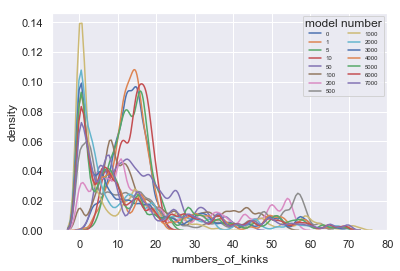

In [19]:
#Plot the density of the numbers of kinks on each of the model
import seaborn as sns
sns.set(color_codes=True)
for j,i in enumerate(considered_model_nums):
    h = numbers_of_kinks_model_all_np[j]
    sns.kdeplot(h,bw=1,label =i)
# Plot formatting and save
plt.rcParams.update({'font.size': 12})
plt.legend(prop={'size': 6}, title = 'model number',ncol=2, loc='upper right')
plt.xlabel('numbers_of_kinks')
plt.ylabel('density')
plt.savefig('./results_kinks/density_plot_kinks_some_epochs_r_0.1_bw_1_2d_data_300_training_samples.pdf')
plt.show()

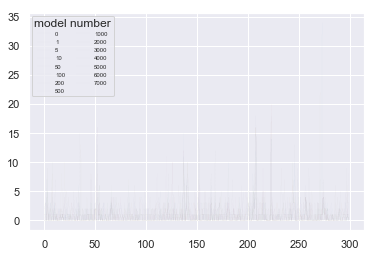

In [92]:
#Plot the number of kinks of the samples 
for j,i in enumerate(considered_model_nums):
    plt.plot(numbers_of_kinks_model_all_np[j],linewidth =0.01, label = i)
plt.legend(prop={'size': 6}, title = 'model number',ncol=2, loc='upper left')
plt.savefig('./results_kinks/plot_kinks_some_epochs_2d_data_300_training_samples_1.pdf')

In [150]:
#Quick rough check the input to ReLU values with weights and biases of a particular model
model_filepath_fully = './models_kinks/weights_model'+'_'+str(2000)+'.hdf5'
model_loaded_fully = load_model(model_filepath_fully)
weights = model_loaded_fully.layers[0].get_weights()[0]
biases = model_loaded_fully.layers[0].get_weights()[1]
print('Shape of weights: ', weights.shape)
print('Shape of weights: ',biases.shape)

inp = model_loaded_fully.input                                           # input placeholder
outputs = [layer.output for layer in model_loaded_fully.layers]          # all layer outputs
x = outputs[0].op.inputs[0]
functor_k1 = K.function([inp, K.learning_phase()], [x])   # evaluation function

layer_outs = np.array(functor_k1([x_train_2d_seq, 0.]))
print('The input to ReLU values shape: ',np.array(layer_outs).shape)
print('The input to ReLU values: \n',np.array(layer_outs))
print('\nmax:',np.max(layer_outs))
print('\nmin:',np.min(layer_outs))

Shape of weights:  (2, 256)
Shape of weights:  (256,)
The input to ReLU values shape:  (1, 300, 256)
The input to ReLU values: 
 [[[-0.05728636  0.09579397  0.05059704 ...  0.01167201  0.09425141
    0.07421963]
  [-0.08143229 -0.05732997  0.1425682  ...  0.01680289 -0.06450301
    0.20832324]
  [-0.06010837  0.2076451   0.06006736 ...  0.03443614  0.21308182
    0.11488213]
  ...
  [-0.1056006   0.0376601   0.23217803 ...  0.06434757  0.03946444
    0.3903653 ]
  [-0.10962588  0.05722978  0.24706575 ...  0.07290664  0.06074998
    0.42140675]
  [-0.10647725  0.01930339  0.23564327 ...  0.0623477   0.02015001
    0.3927693 ]]]

max: 1.8628507

min: -2.6894243


In [151]:
#Sanity check for the ReLU layer, printing values after the ReLU activation
functor_k2 = K.function([inp, K.learning_phase()], [outputs[0]])   # evaluation function
layer_outs = functor_k2([x_train_2d_seq, 0.])
print(np.array(layer_outs).shape)
print(np.array(layer_outs))

(1, 300, 256)
[[[-0.          0.09579397  0.05059704 ...  0.01167201  0.09425141
    0.07421963]
  [-0.         -0.          0.1425682  ...  0.01680289 -0.
    0.20832324]
  [-0.          0.2076451   0.06006736 ...  0.03443614  0.21308182
    0.11488213]
  ...
  [-0.          0.0376601   0.23217803 ...  0.06434757  0.03946444
    0.3903653 ]
  [-0.          0.05722978  0.24706575 ...  0.07290664  0.06074998
    0.42140675]
  [-0.          0.01930339  0.23564327 ...  0.0623477   0.02015001
    0.3927693 ]]]
